# <center> **Graphs For Biomedical Data Study** </center>

In [1]:
## Loading Librarbies and Checking For Availability
try:
    import pandas as pd
    print("Library is available.")
    import matplotlib.pyplot as plt
    print("Library is available.")
    from scipy import stats
    print("Library is available.")
    from statsmodels.formula.api import ols
    print("Library is available.")
    from io import StringIO
    print("Library is available.")
    import seaborn as sns
    print("Library is available.")
    
except ImportError:
    print("Library is not available.")

## Changing Potential Options
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.


In [2]:
## Loading Dataset And Viewing
health = pd.read_excel('health_cleaned_python.xlsx')
health.head(10)

Date  Weight  Waist  Neck  Morning Body Temp  \
0 2024-01-26   275.6   47.5  17.0               95.7   
1 2024-01-27   271.8   47.0  17.0               96.2   
2 2024-01-28   271.8   47.0  17.0               96.7   
3 2024-01-29   272.8   47.0  17.0               97.5   
4 2024-01-30   269.6   46.5  17.0               97.7   
5 2024-01-31   268.6   47.0  17.0               96.1   
6 2024-02-01   268.8   46.5  17.0               96.4   
7 2024-02-02   268.8   46.5  17.0               96.4   
8 2024-02-03   269.4   47.0  17.0               97.7   
9 2024-02-04   272.6   47.0  17.0               96.7   

   Morning Systolic Pressure  Morning Diastolic Pressure  Morning Pulse  \
0                        113                          73             74   
1                        114                          75             67   
2                        136                          76             71   
3                        131                          85             76   
4                        123                          79             84   
5                        132                          75             62   
6                        132                          70             71   
7                        132                          70             71   
8                        120                          77             76   
9                        119                          75             71   

   Night Body Temp  Night Systolic Pressure  Night Diastolic Pressure  \
0             97.4                      128                        79   
1             97.8                      108                        75   
2             96.1                      112                        63   
3             97.1                      158                        88   
4             98.6                      120                        71   
5             96.5                      156                        83   
6             97.3                      113                        75   
7             97.3                      113                        75   
8             96.5                      124                        75   
9             96.4                      116                        74   

   Night Pulse  Sleep    BMI    CBF  Gym  Cardio  Calories   Carbs    Fat   \
0           73   11.5  39.54  35.19    1       1   1465.00  189.50   50.50   
1           82    5.5  38.99  34.57    1       0   2521.00  499.95   85.00   
2           70    8.0  38.99  34.57    0       0   1385.19  172.41   39.08   
3           86    8.0  39.14  34.57    1       0    570.00  108.00   12.00   
4           81   10.0  38.68  33.95    1       1   1946.33  259.04   60.10   
5           73    9.0  38.54  34.57    1       0   1265.23  195.20   34.86   
6           89   10.0  38.56  33.95    1       1   2167.33  309.47   70.80   
7           89    0.0  38.56  33.95    0       0   4080.00  349.00  229.00   
8           66   16.5  38.65  34.57    1       0   2535.93  235.18  120.44   
9           68   10.0  39.11  34.57    1       0   1635.93  139.18   82.44   

   Protein  Fiber   Sugar  Servings  Water  Fat Calories  
0    73.00  19.00   67.50     17.00   0.50        454.50  
1    71.50  34.50  325.45     72.50   0.75        765.00  
2    74.29  41.21   66.44     16.35   0.50        351.68  
3     4.00   8.00   46.00      6.00   0.50        108.00  
4   104.33  47.73   67.67     19.30   2.00        540.88  
5    69.58  42.56   96.87     20.90   1.50        313.76  
6    67.88  19.91  213.35     17.50   1.00        637.21  
7   163.00  15.00   91.00     12.00   0.00       2061.00  
8    99.95  25.37   30.09     35.00   2.00       1083.97  
9    78.45  21.87   20.59     21.50   2.00        741.97

In [3]:
## Creating Subset To Analyze
subset = health[health.columns[1:26]] 
subset.head(10)

Weight  Waist  Neck  Morning Body Temp  Morning Systolic Pressure  \
0   275.6   47.5  17.0               95.7                        113   
1   271.8   47.0  17.0               96.2                        114   
2   271.8   47.0  17.0               96.7                        136   
3   272.8   47.0  17.0               97.5                        131   
4   269.6   46.5  17.0               97.7                        123   
5   268.6   47.0  17.0               96.1                        132   
6   268.8   46.5  17.0               96.4                        132   
7   268.8   46.5  17.0               96.4                        132   
8   269.4   47.0  17.0               97.7                        120   
9   272.6   47.0  17.0               96.7                        119   

   Morning Diastolic Pressure  Morning Pulse  Night Body Temp  \
0                          73             74             97.4   
1                          75             67             97.8   
2                          76             71             96.1   
3                          85             76             97.1   
4                          79             84             98.6   
5                          75             62             96.5   
6                          70             71             97.3   
7                          70             71             97.3   
8                          77             76             96.5   
9                          75             71             96.4   

   Night Systolic Pressure  Night Diastolic Pressure  Night Pulse  Sleep  \
0                      128                        79           73   11.5   
1                      108                        75           82    5.5   
2                      112                        63           70    8.0   
3                      158                        88           86    8.0   
4                      120                        71           81   10.0   
5                      156                        83           73    9.0   
6                      113                        75           89   10.0   
7                      113                        75           89    0.0   
8                      124                        75           66   16.5   
9                      116                        74           68   10.0   

     BMI    CBF  Gym  Cardio  Calories   Carbs    Fat   Protein  Fiber  \
0  39.54  35.19    1       1   1465.00  189.50   50.50    73.00  19.00   
1  38.99  34.57    1       0   2521.00  499.95   85.00    71.50  34.50   
2  38.99  34.57    0       0   1385.19  172.41   39.08    74.29  41.21   
3  39.14  34.57    1       0    570.00  108.00   12.00     4.00   8.00   
4  38.68  33.95    1       1   1946.33  259.04   60.10   104.33  47.73   
5  38.54  34.57    1       0   1265.23  195.20   34.86    69.58  42.56   
6  38.56  33.95    1       1   2167.33  309.47   70.80    67.88  19.91   
7  38.56  33.95    0       0   4080.00  349.00  229.00   163.00  15.00   
8  38.65  34.57    1       0   2535.93  235.18  120.44    99.95  25.37   
9  39.11  34.57    1       0   1635.93  139.18   82.44    78.45  21.87   

    Sugar  Servings  Water  Fat Calories  
0   67.50     17.00   0.50        454.50  
1  325.45     72.50   0.75        765.00  
2   66.44     16.35   0.50        351.68  
3   46.00      6.00   0.50        108.00  
4   67.67     19.30   2.00        540.88  
5   96.87     20.90   1.50        313.76  
6  213.35     17.50   1.00        637.21  
7   91.00     12.00   0.00       2061.00  
8   30.09     35.00   2.00       1083.97  
9   20.59     21.50   2.00        741.97

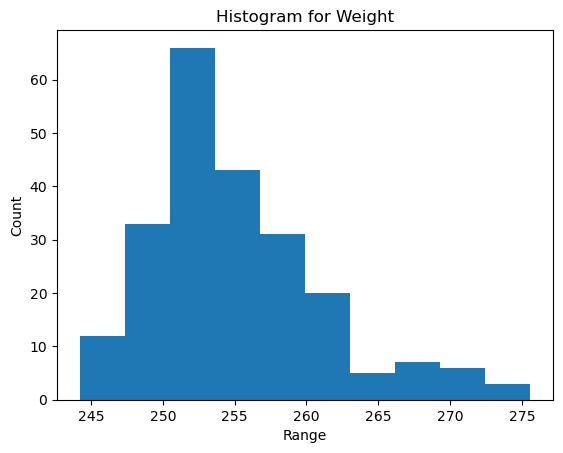

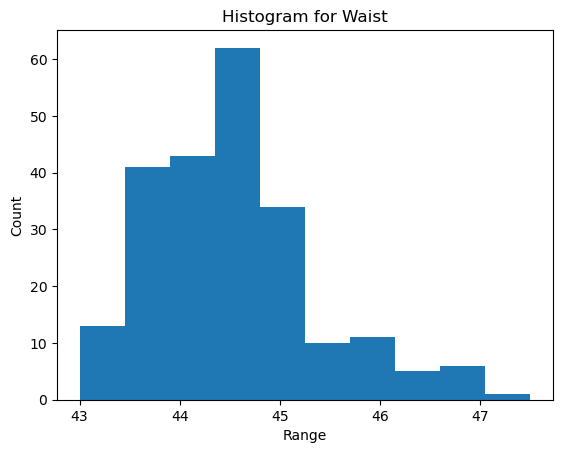

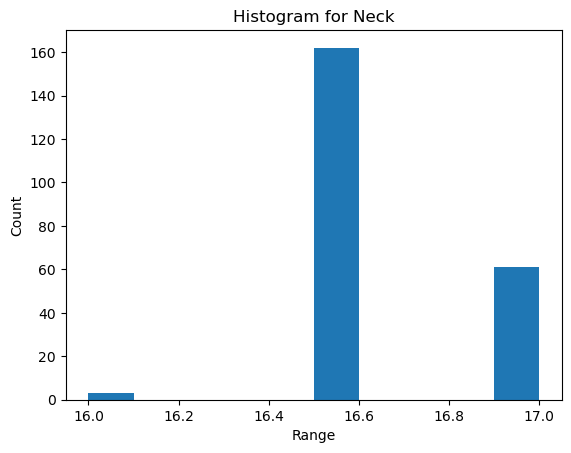

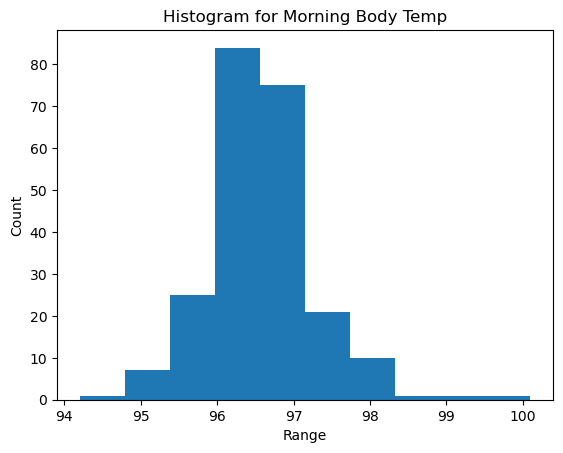

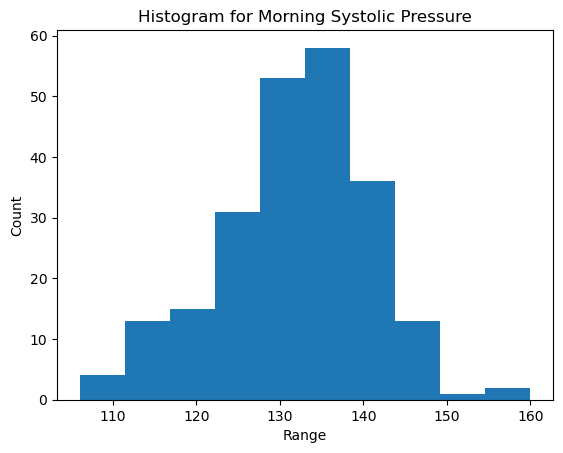

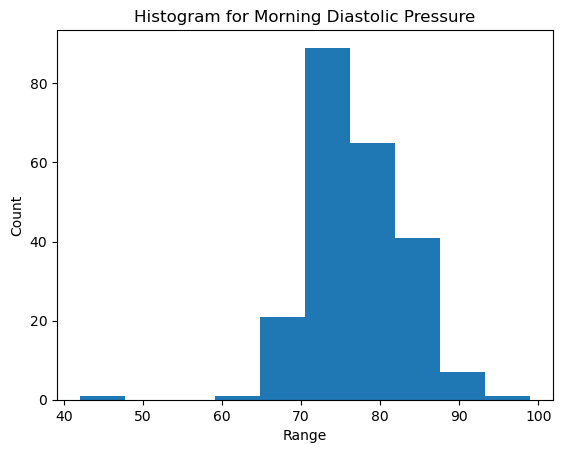

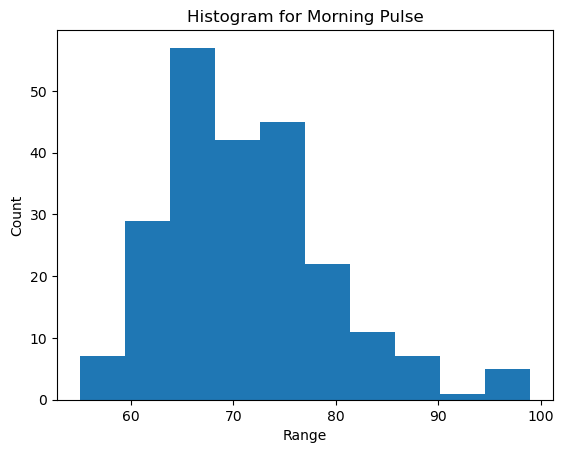

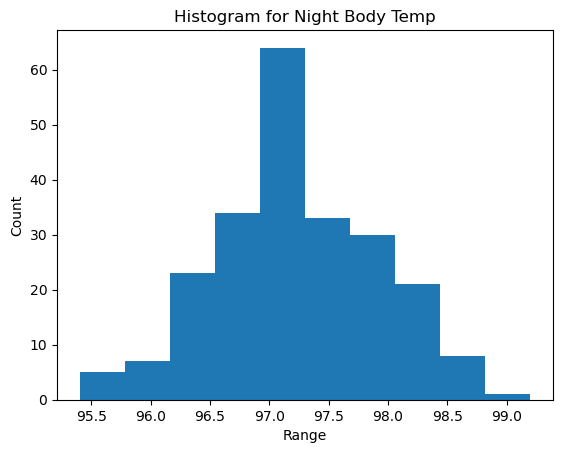

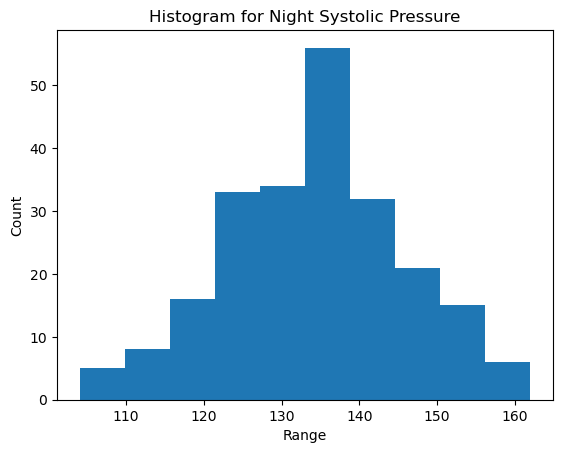

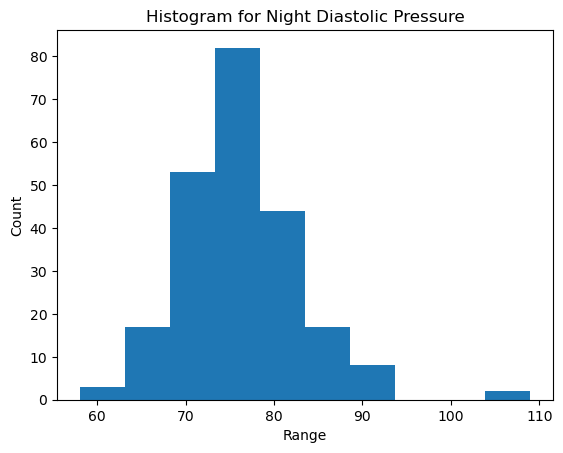

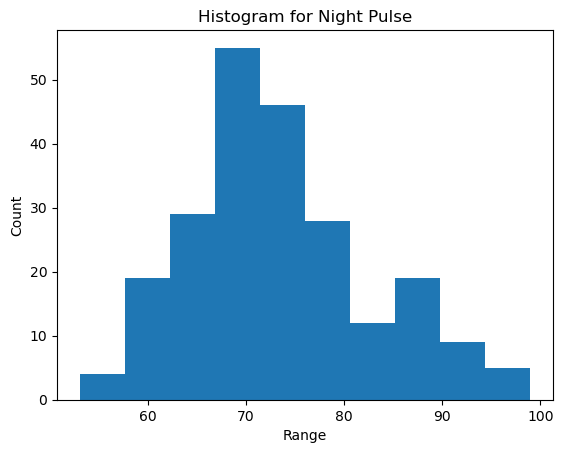

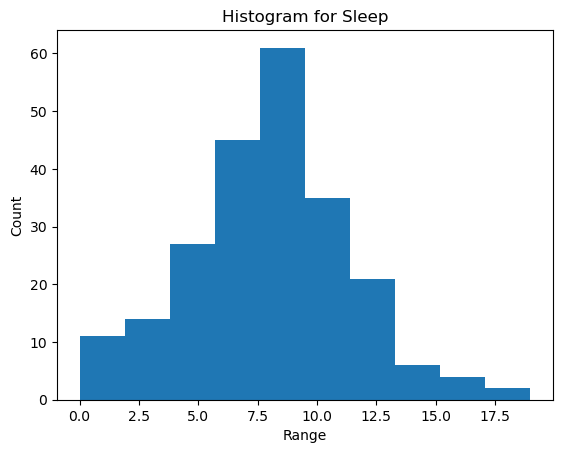

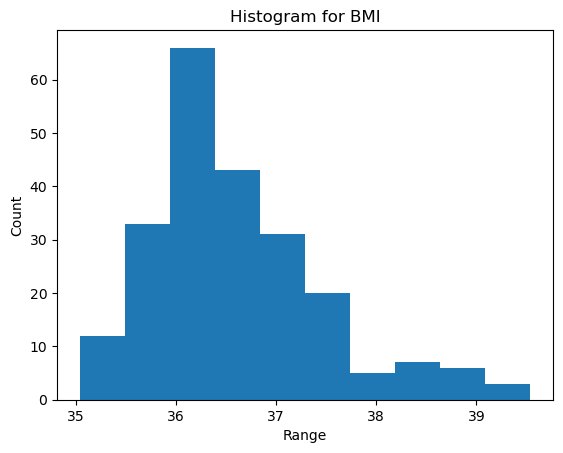

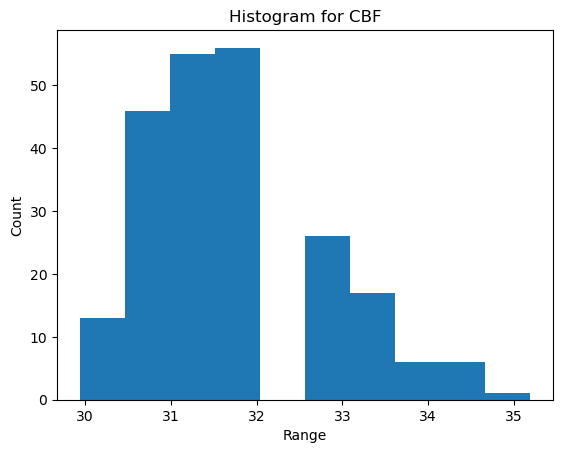

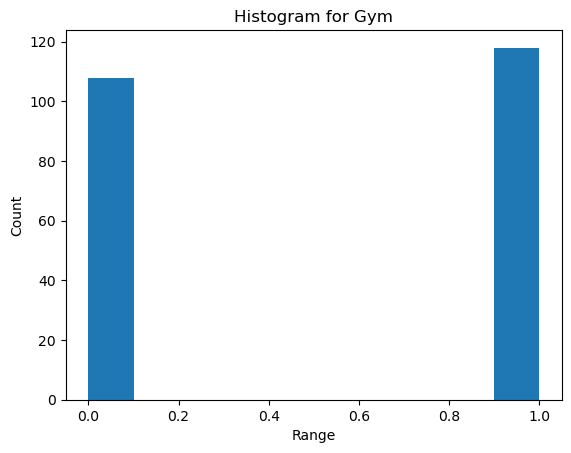

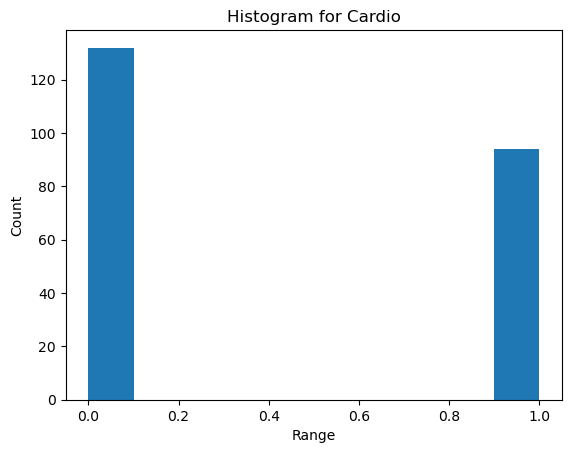

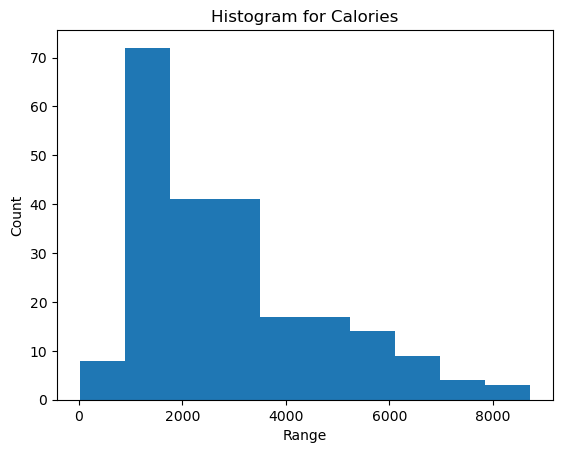

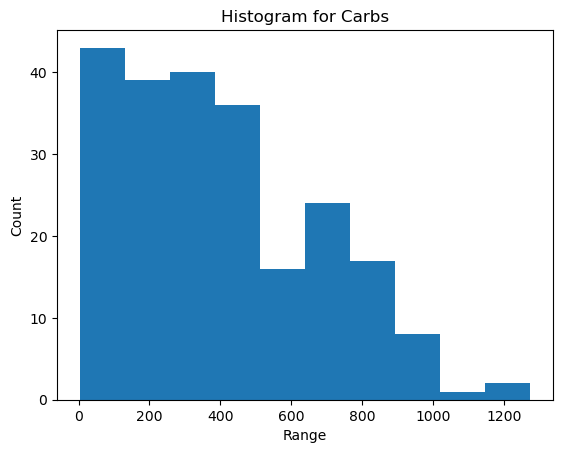

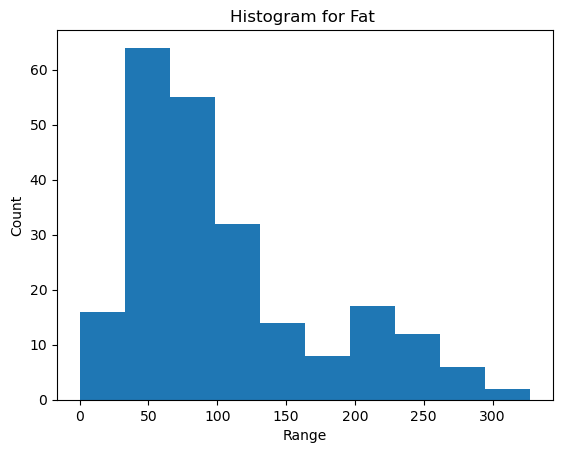

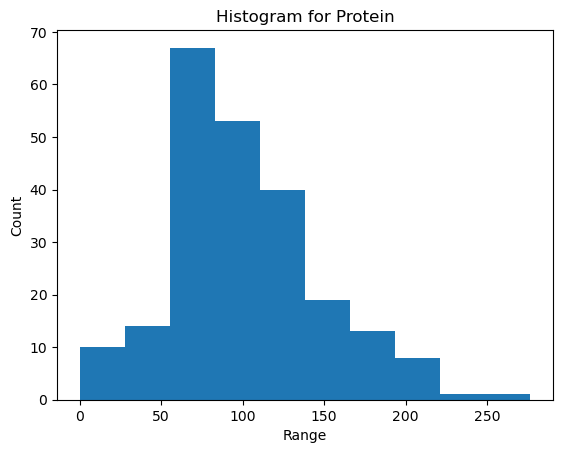

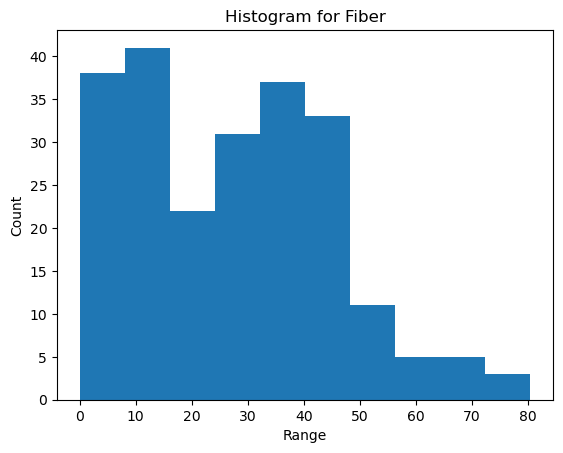

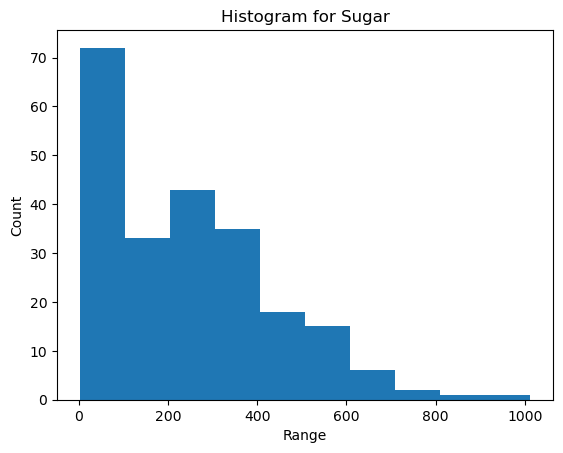

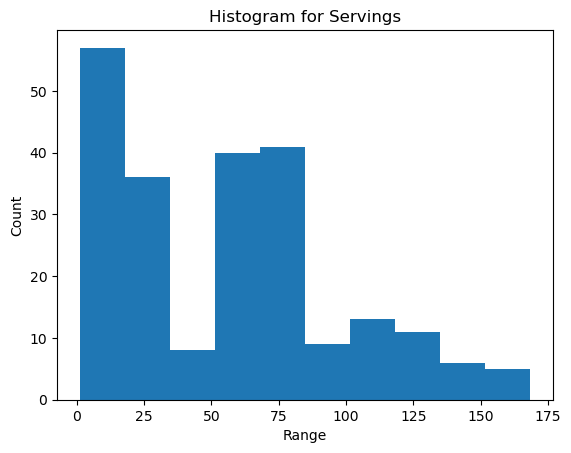

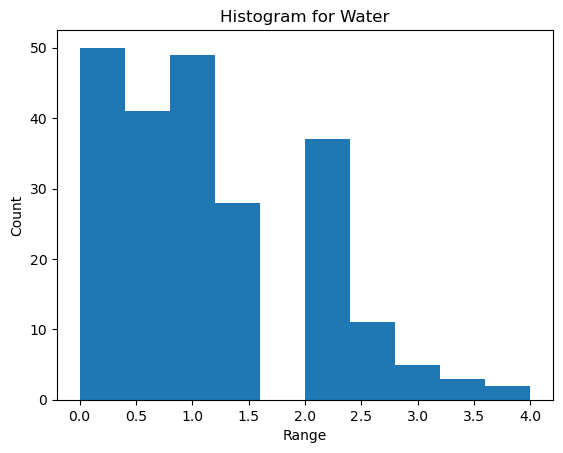

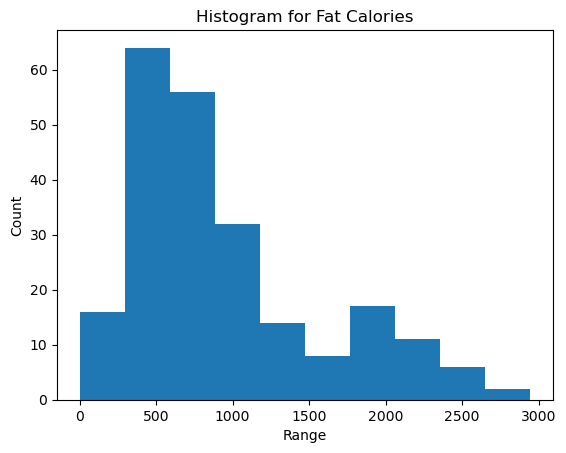

In [4]:
## Plain Histograms For All Variables
for i in subset:
    plt.hist(subset[i])
    plt.title(f'Histogram for {i}')
    plt.xlabel('Range')
    plt.ylabel('Count')
    plt.show()

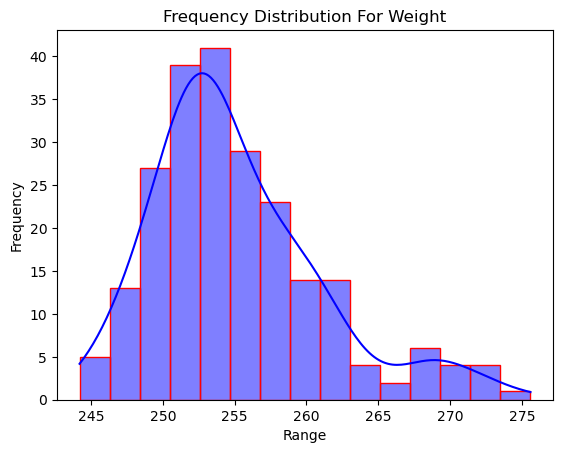

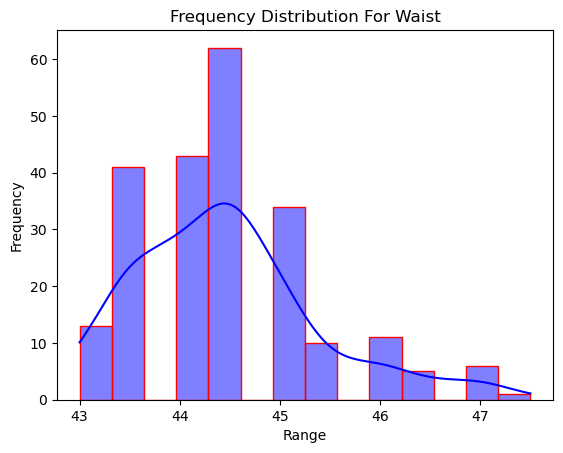

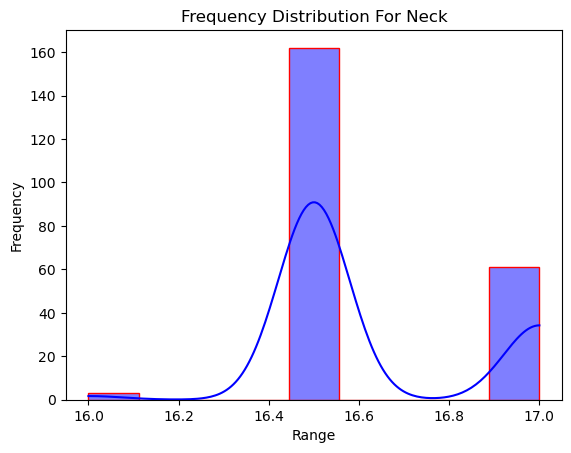

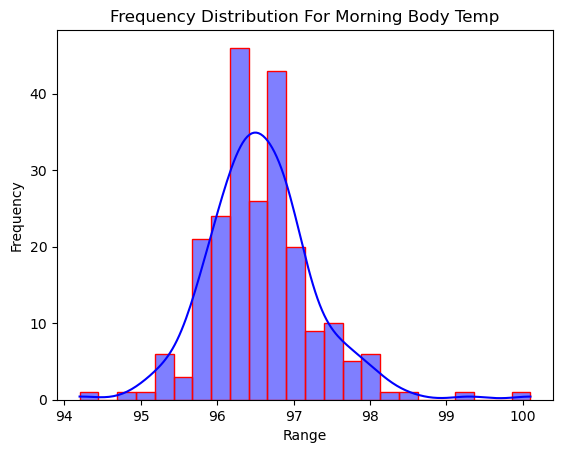

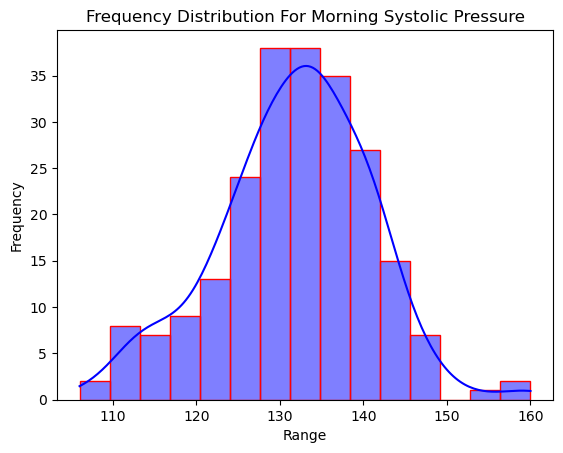

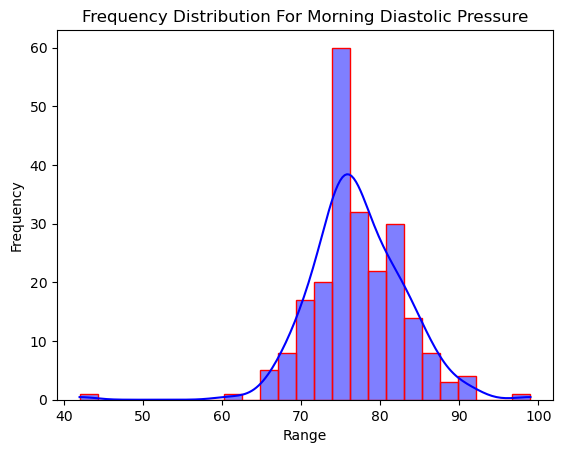

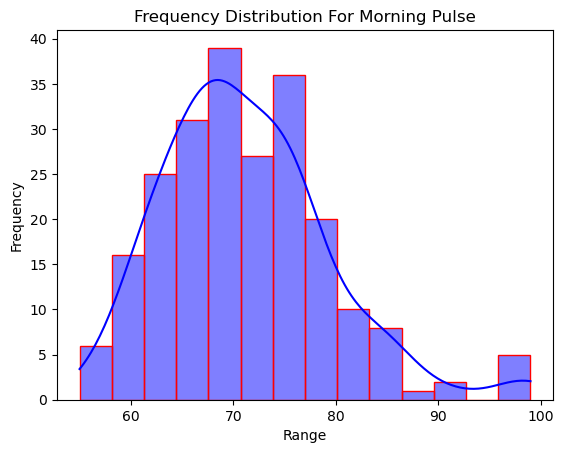

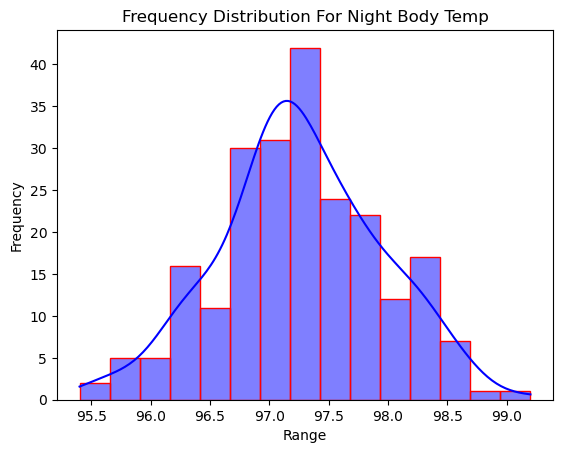

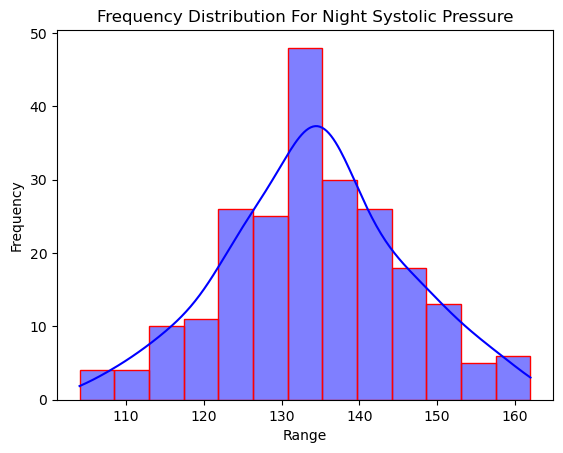

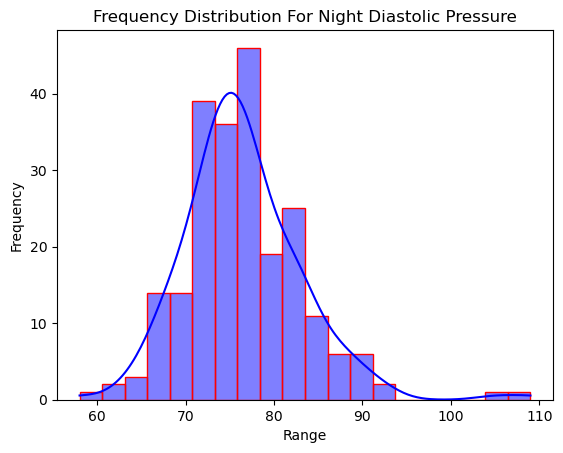

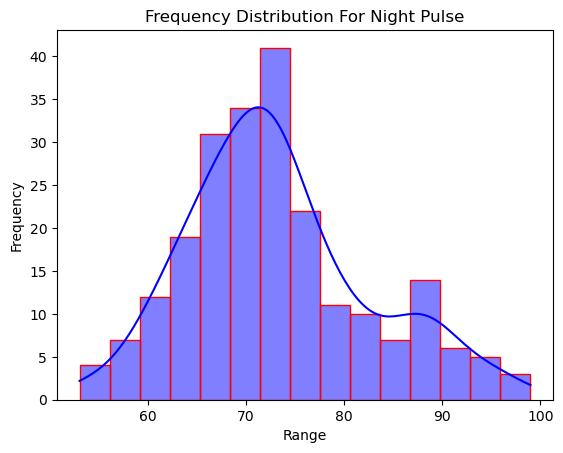

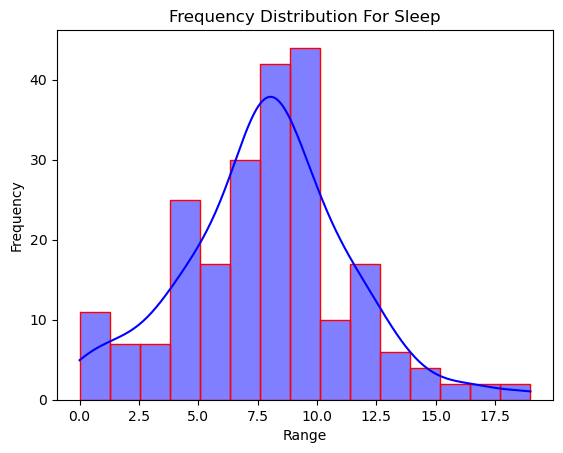

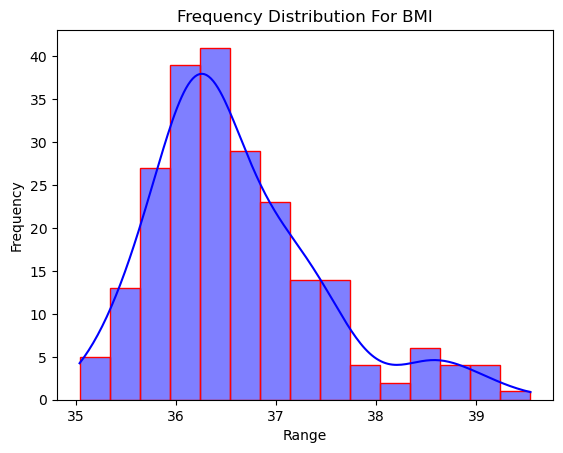

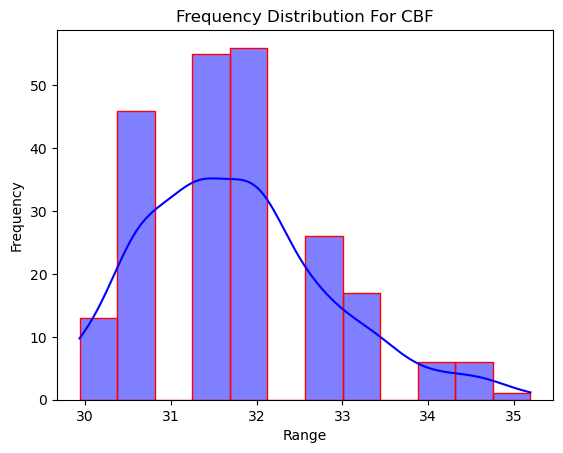

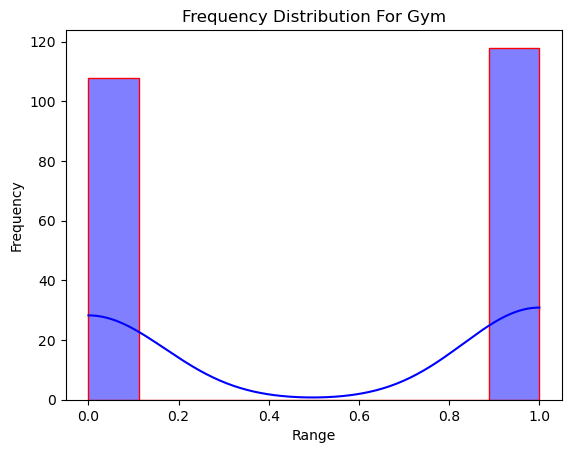

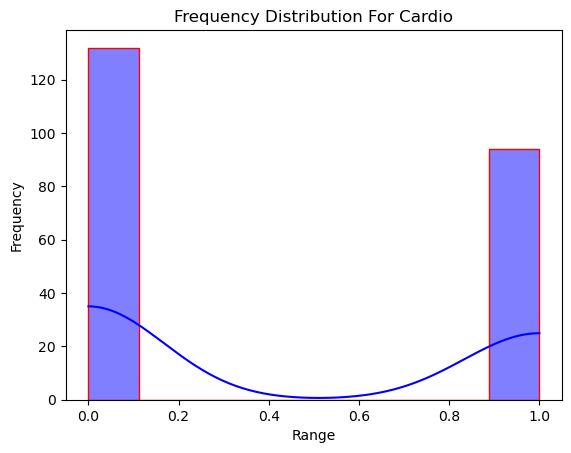

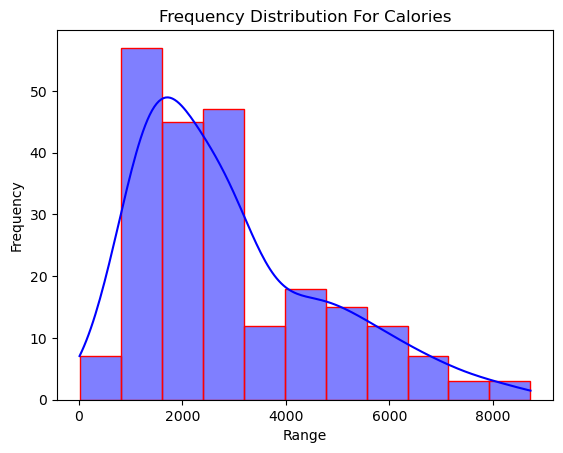

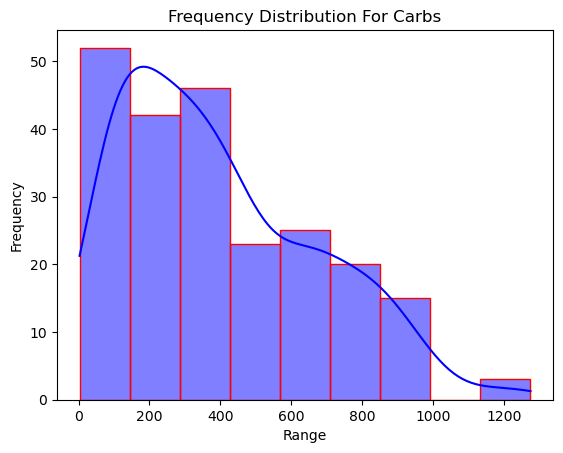

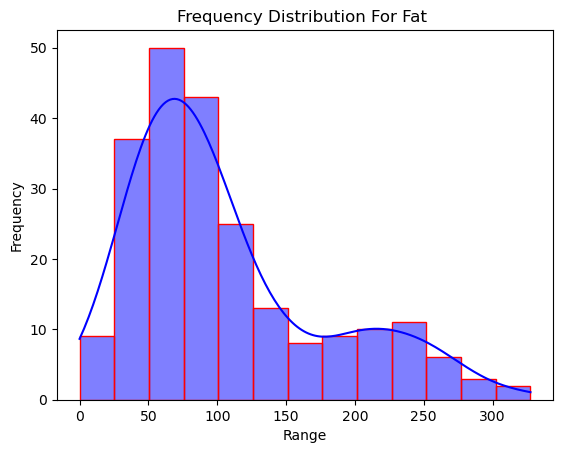

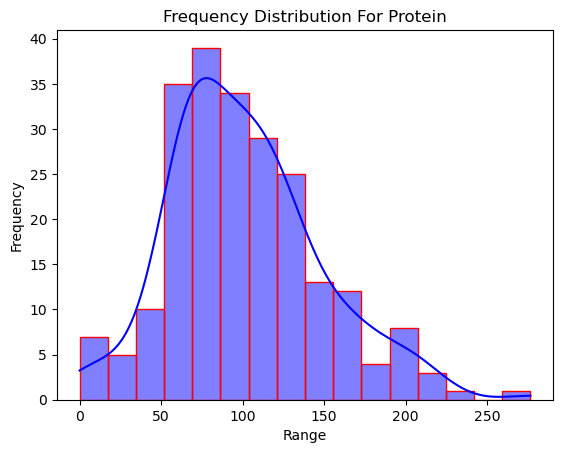

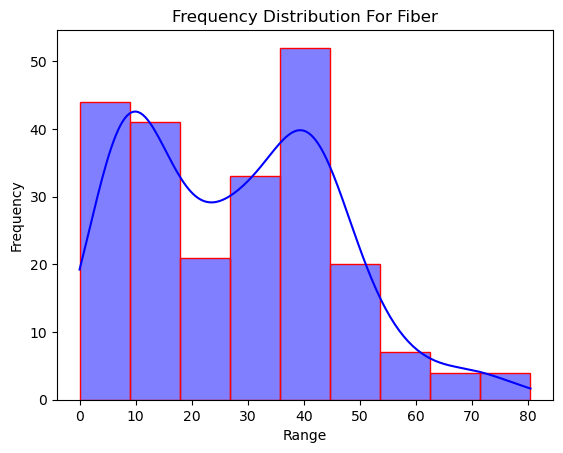

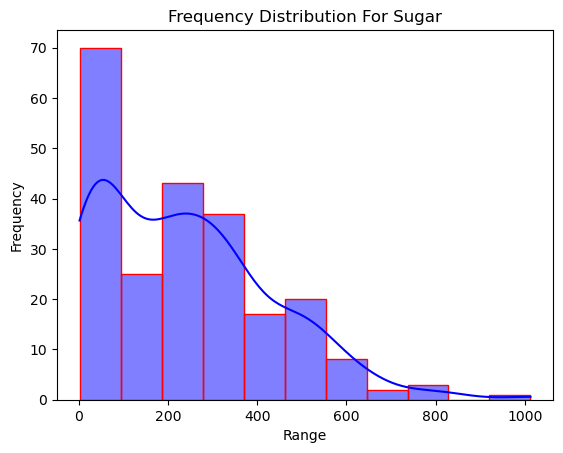

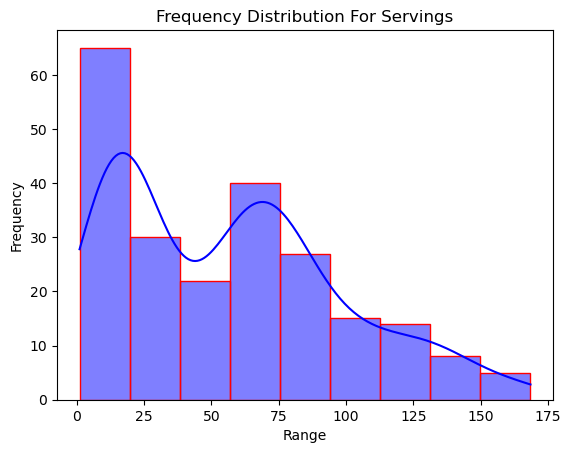

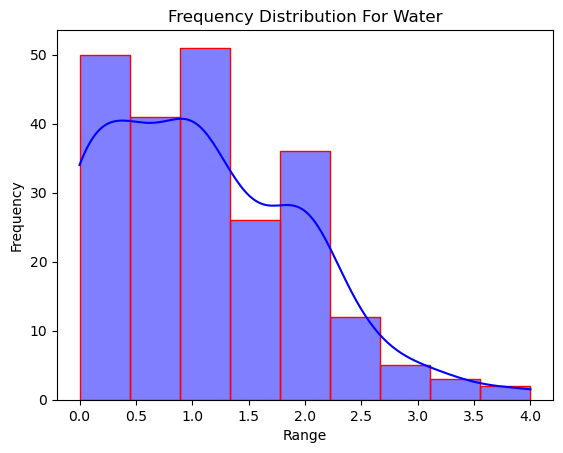

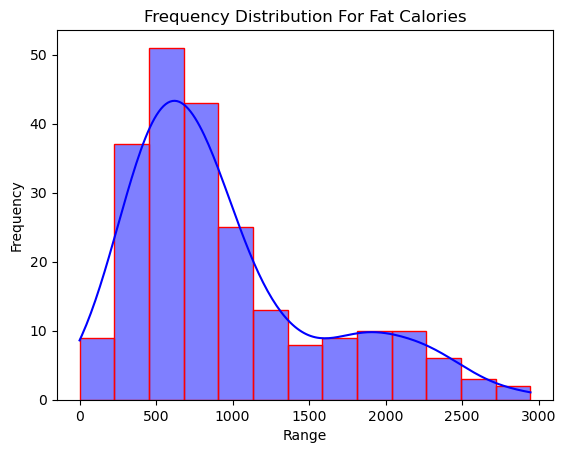

In [5]:
## Frequency Distributions For All Variables
for i in subset:
    p = sns.histplot(subset[i], kde=True, edgecolor='red', color='blue')
    p.set(title=f"Frequency Distribution For {i}", xlabel='Range', ylabel='Frequency')
    plt.show()

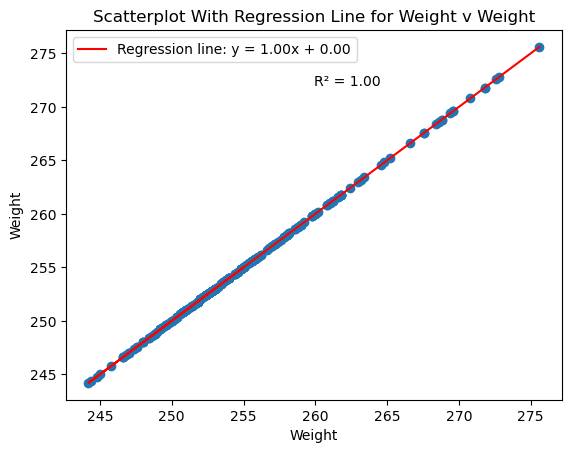

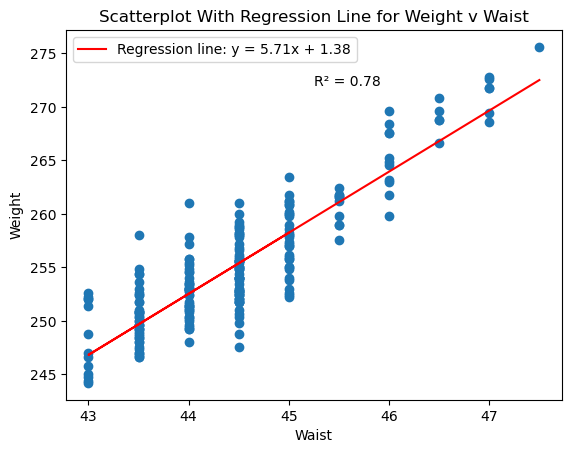

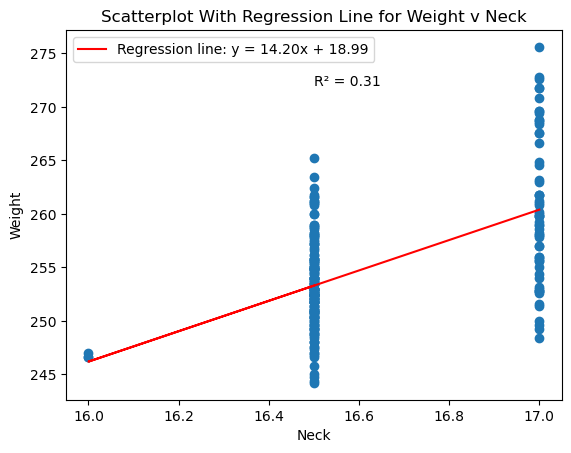

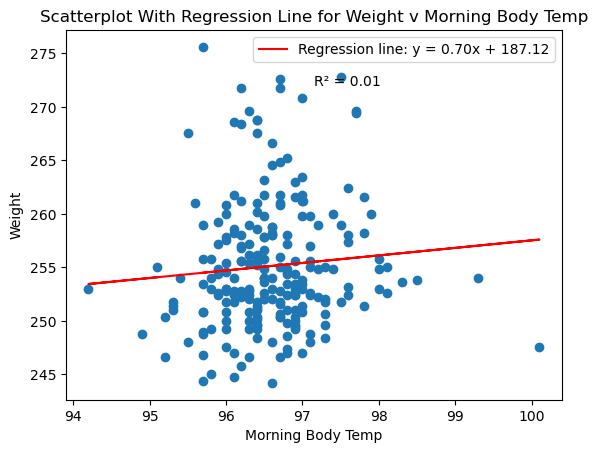

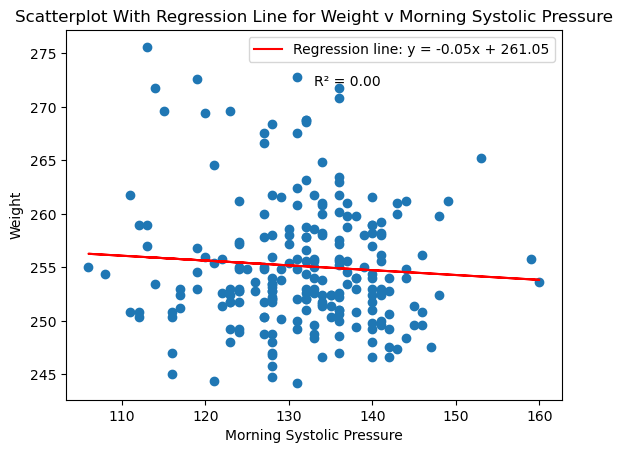

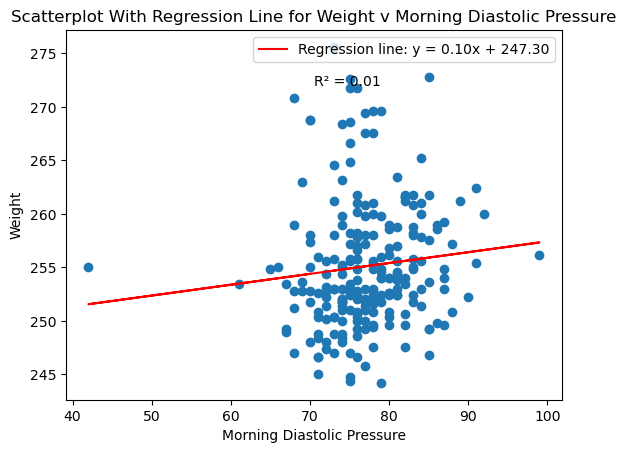

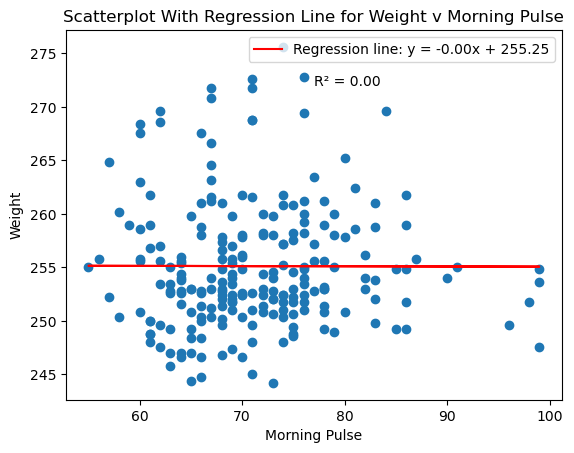

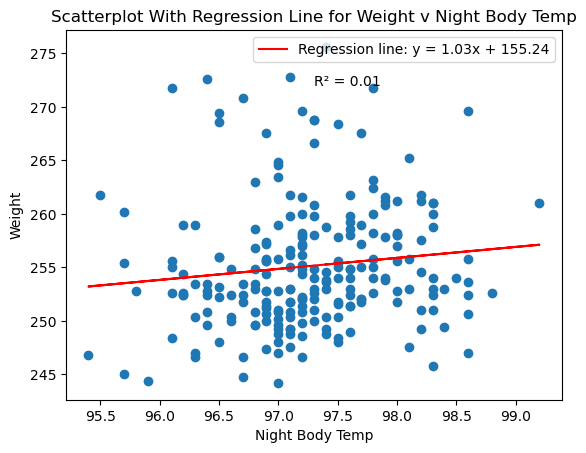

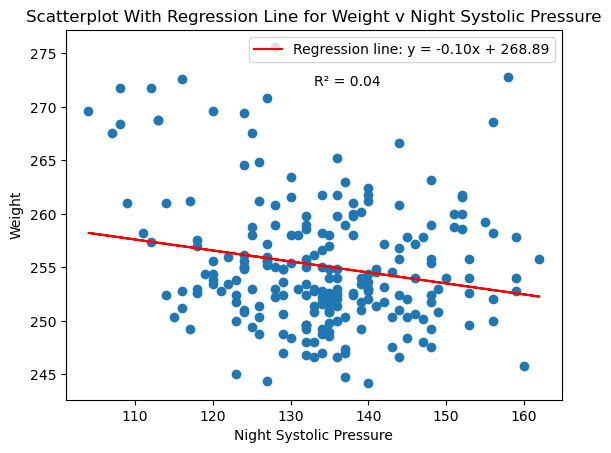

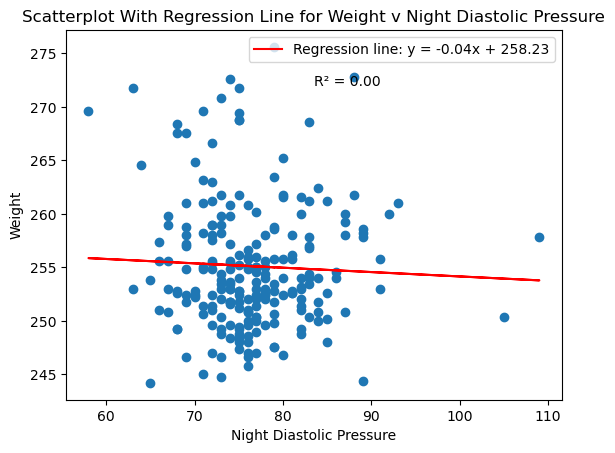

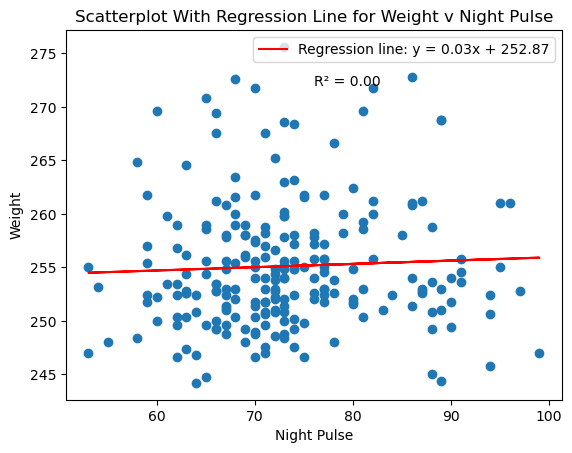

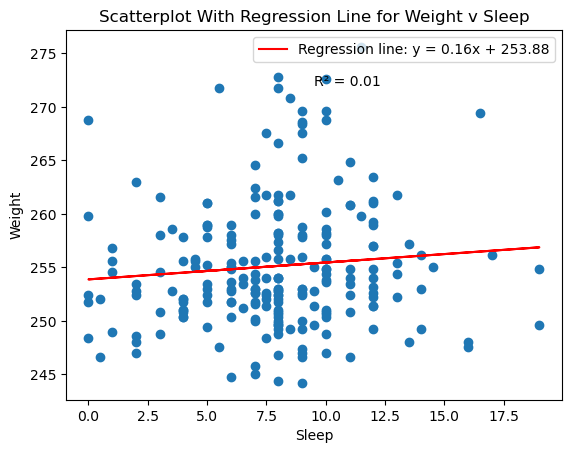

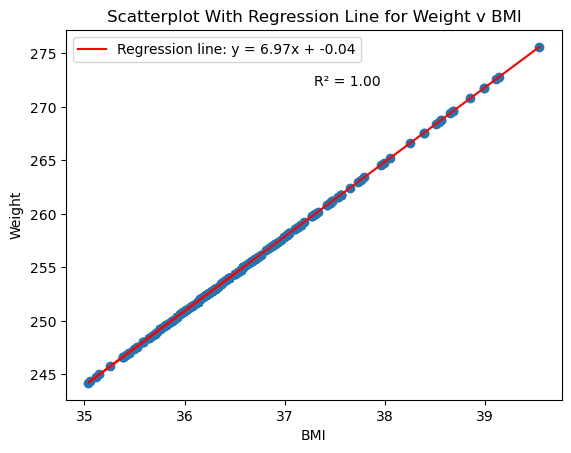

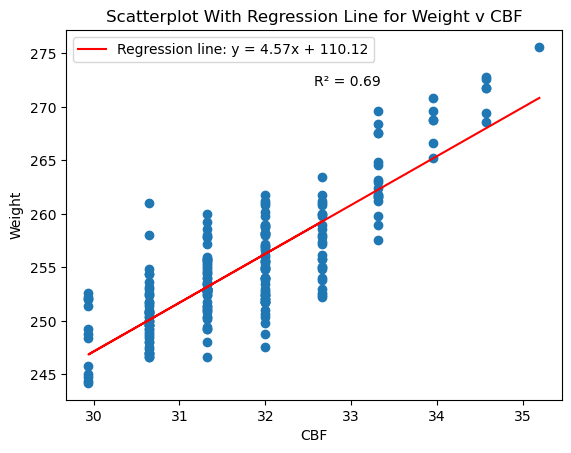

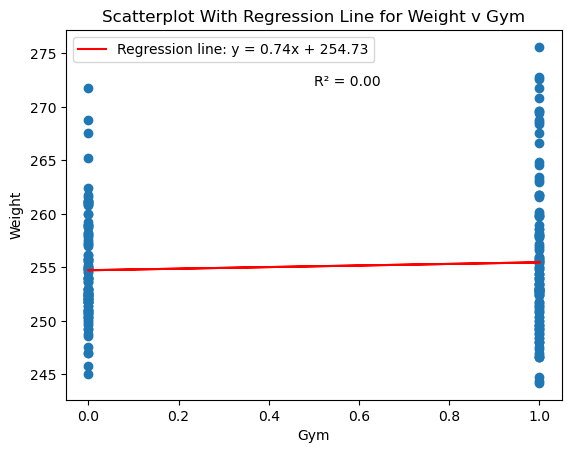

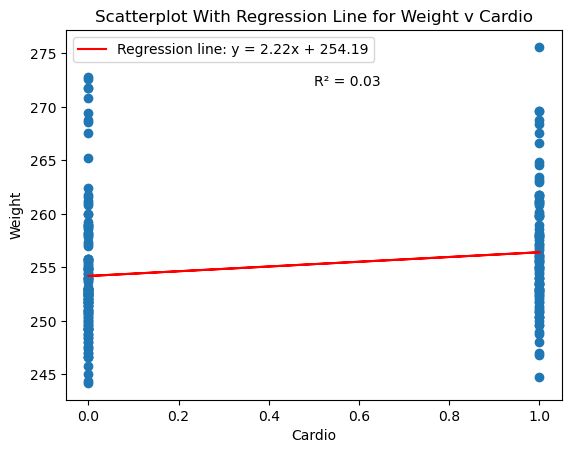

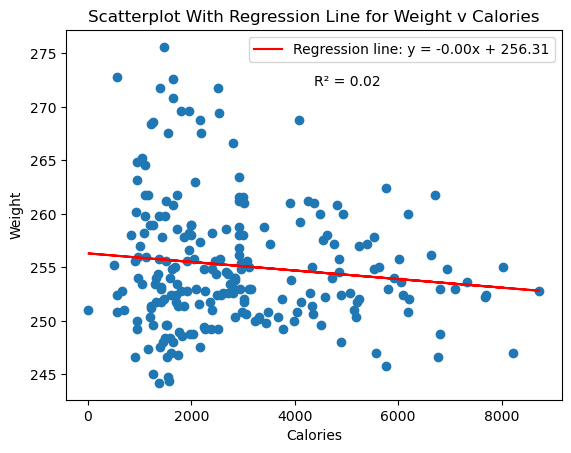

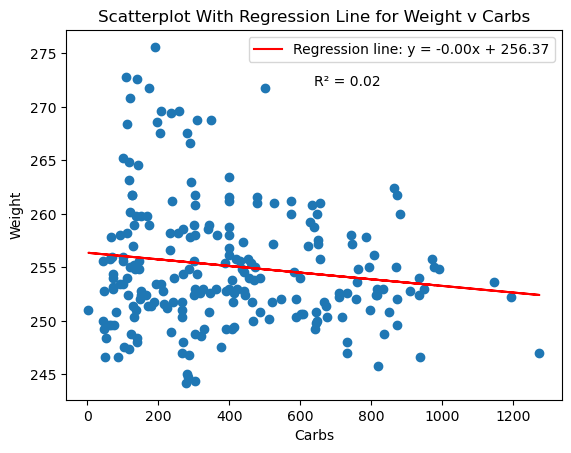

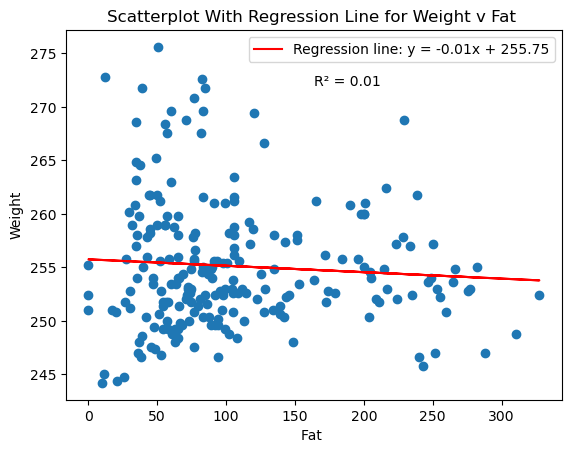

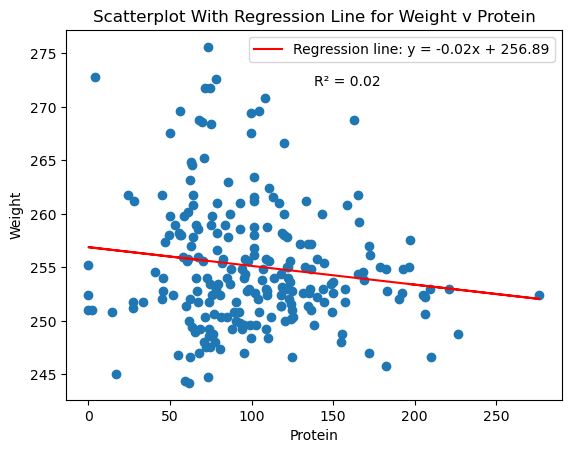

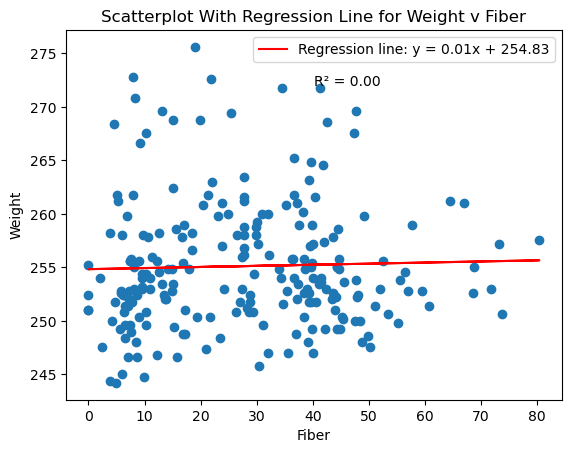

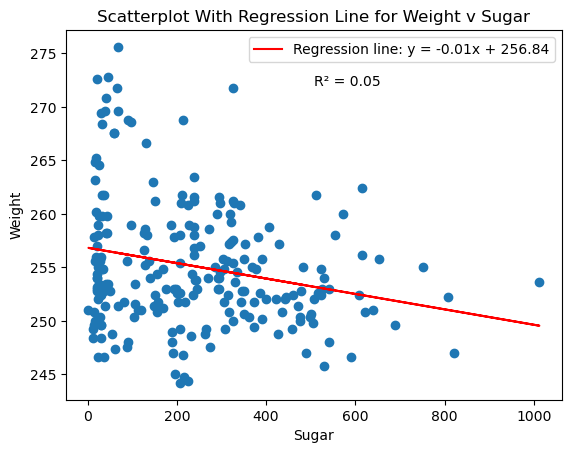

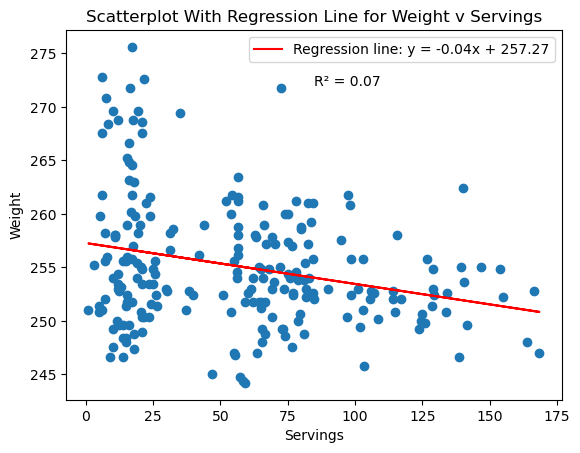

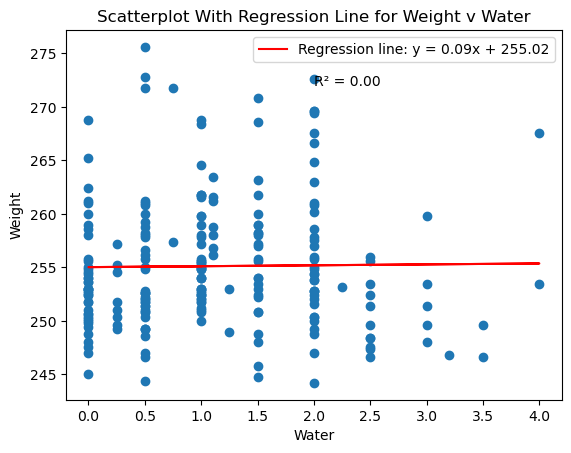

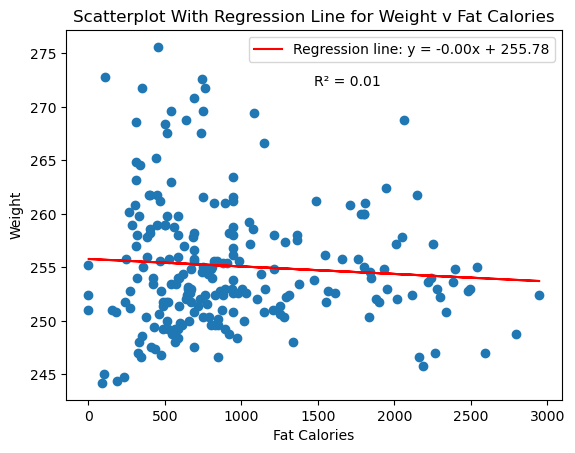

In [6]:
## Scatterplots With Regression Lines and R^2 For All Variables Against Weight
for i in subset:
    x = subset[[i]]
    y = subset['Weight']
    model = ols("y ~ x", subset).fit()
    df = pd.read_html(StringIO(model.summary().tables[1].as_html()),header=0,index_col=0)[0]
    slope = df['coef'].values[1]
    intercept = df['coef'].values[0]
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    plt.plot(x, intercept + slope*x, 'r', label=f'Regression line: {equation}')
    plt.text(0.5, 0.85, f'R² = {model.rsquared:.2f}', transform=plt.gca().transAxes)
    plt.xlabel(i)
    plt.ylabel('Weight')
    plt.title(f"Scatterplot With Regression Line for Weight v {i}")
    plt.legend()
    plt.show()

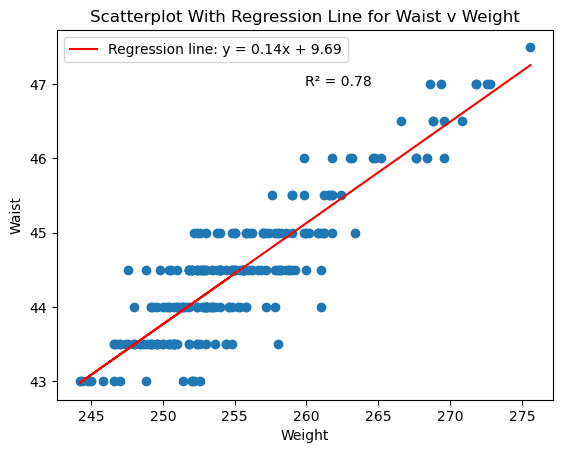

C:\Users\willc\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Users\willc\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Users\willc\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1580: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\Users\willc\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1776: RuntimeWarning: Precision loss occurred in moment calculation due to c

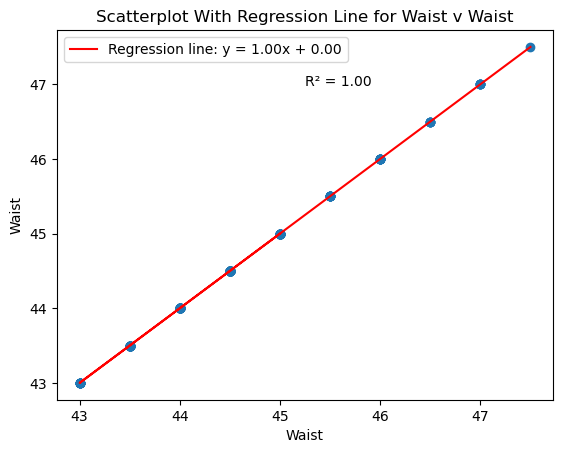

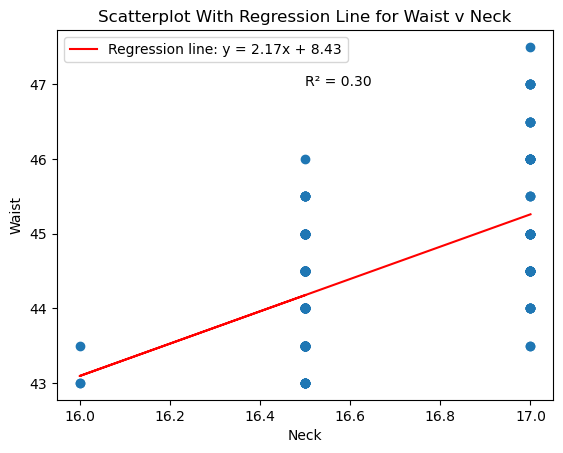

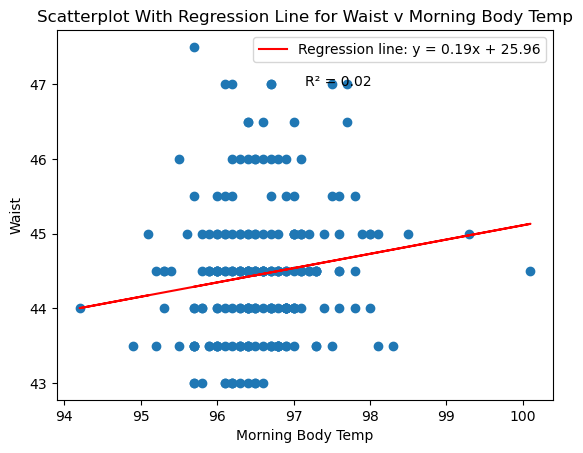

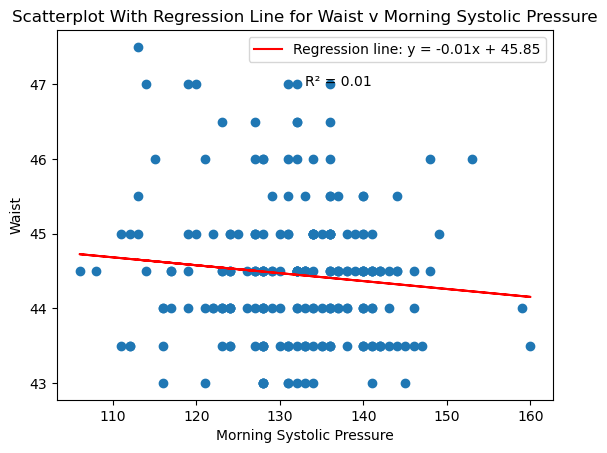

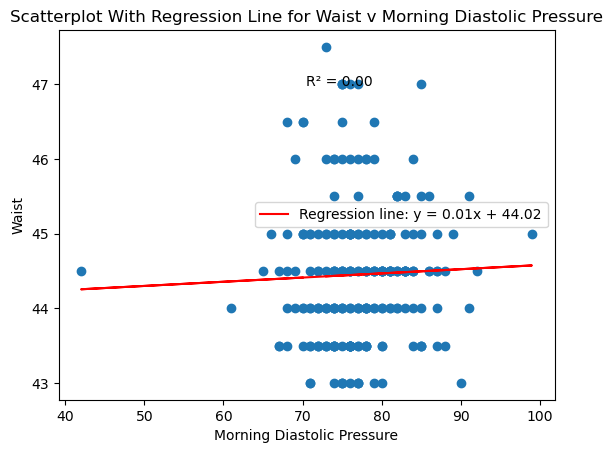

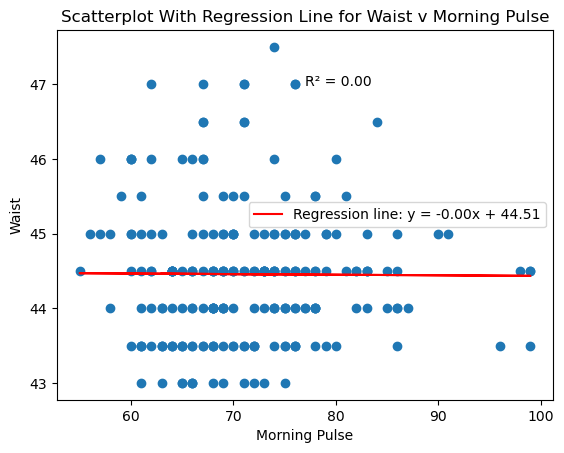

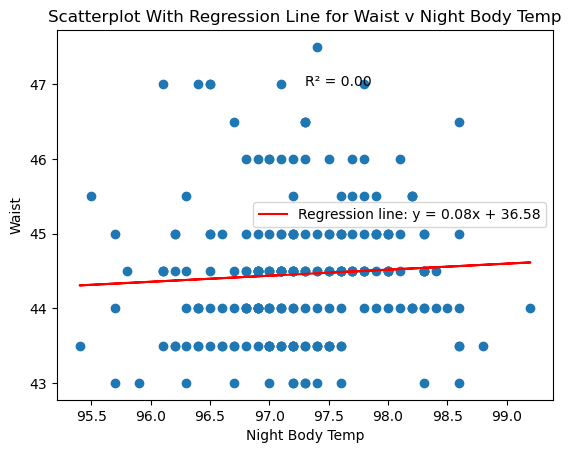

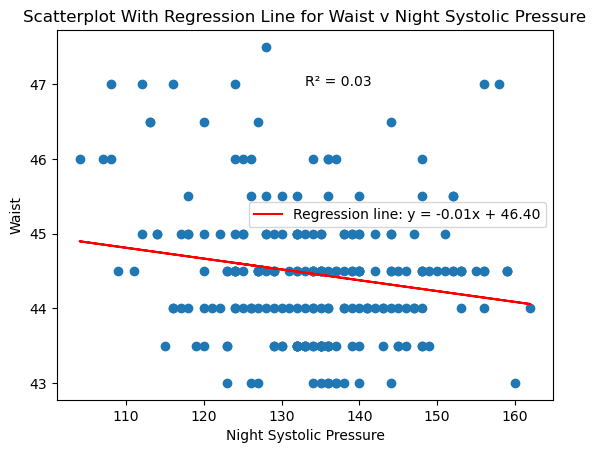

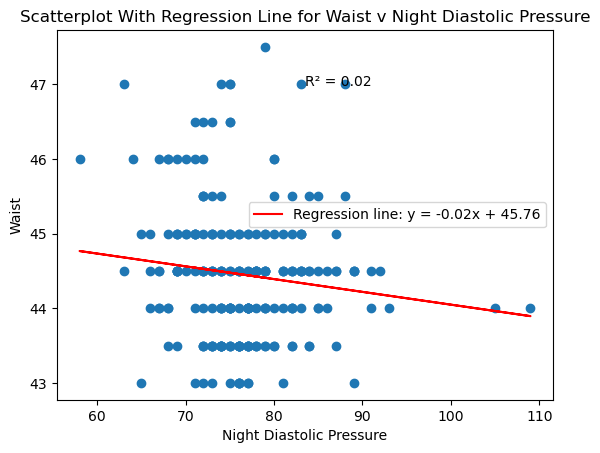

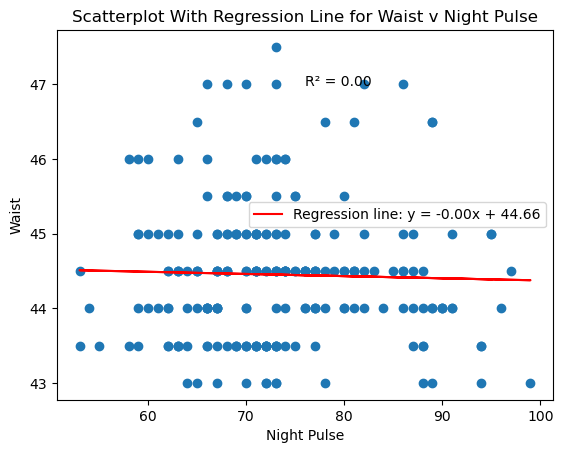

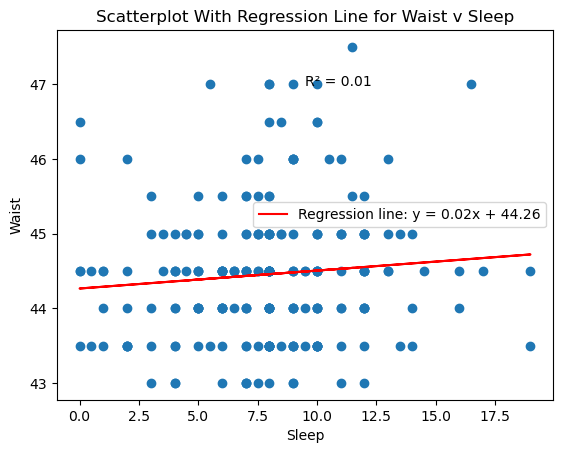

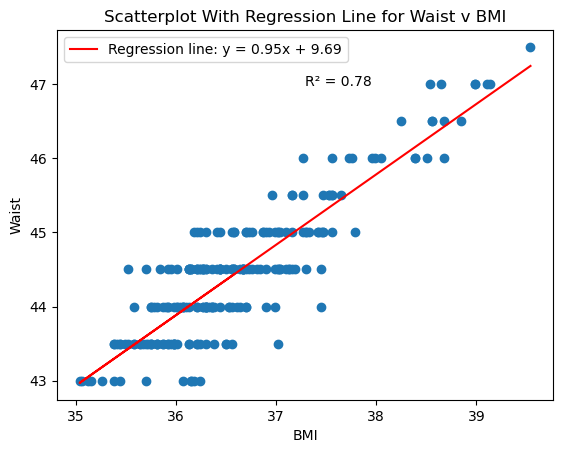

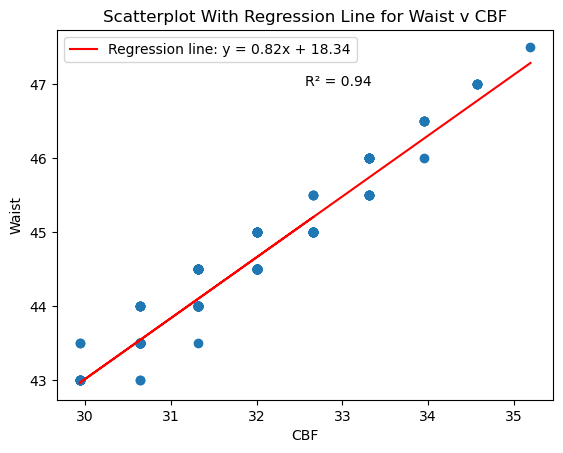

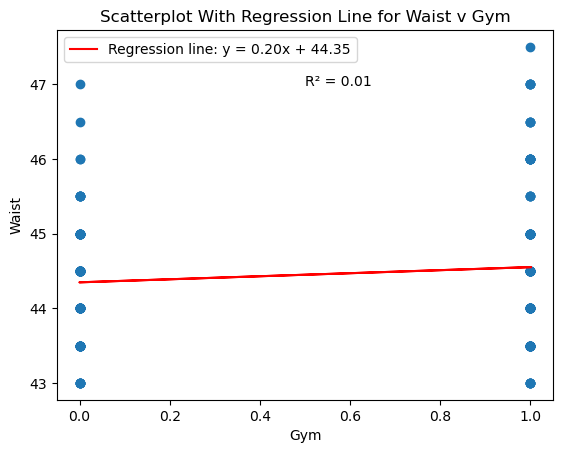

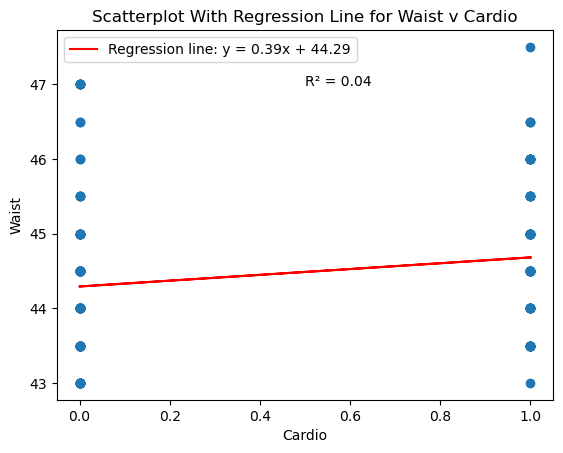

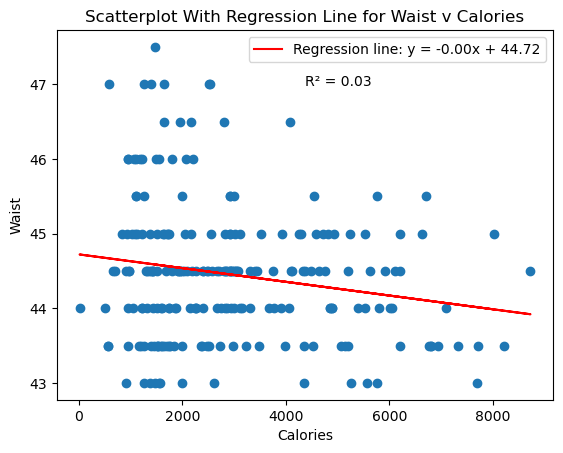

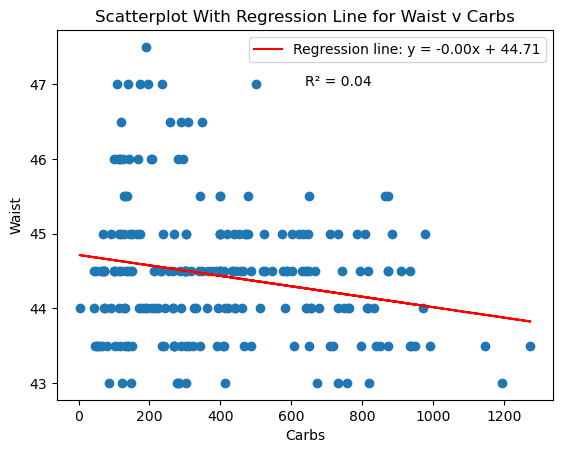

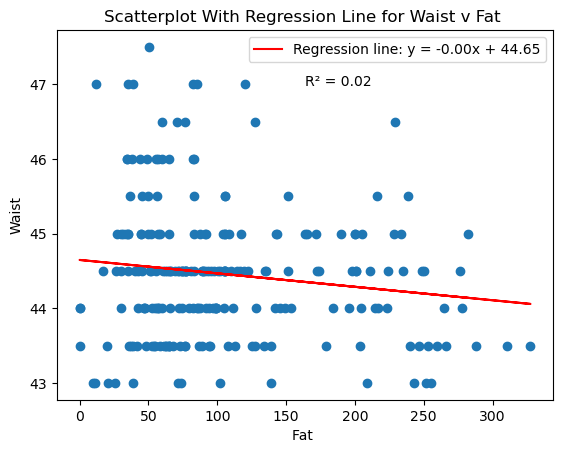

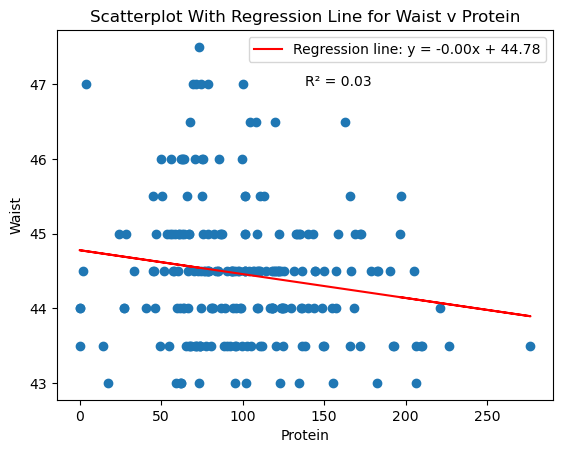

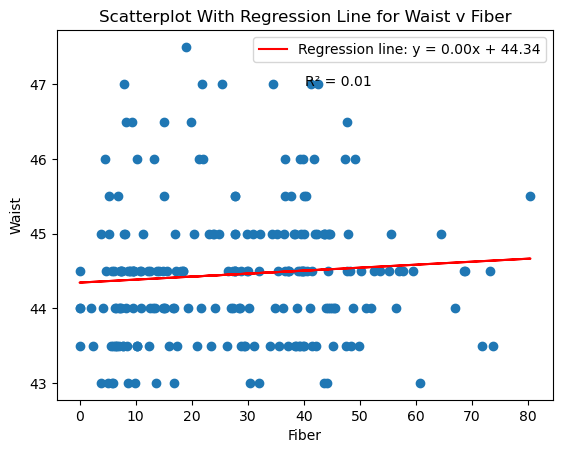

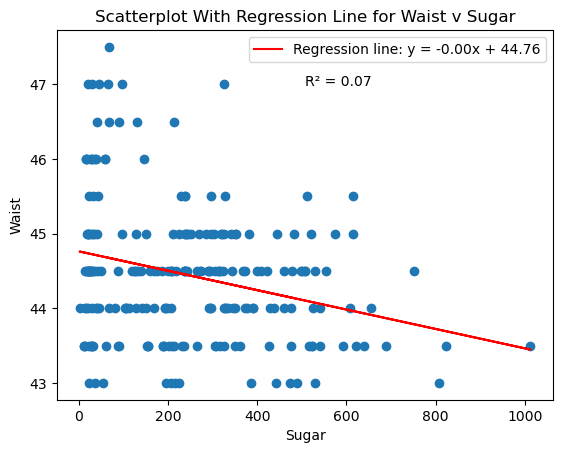

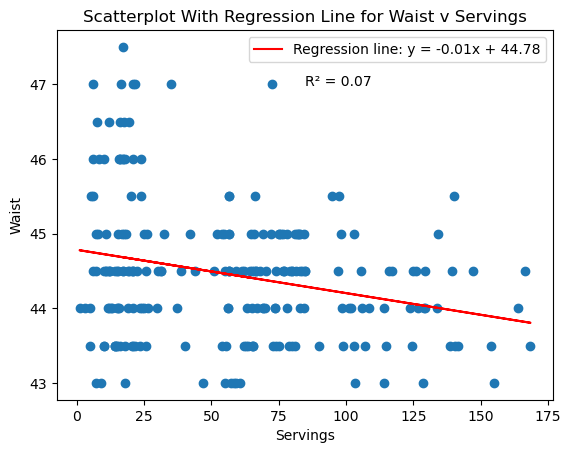

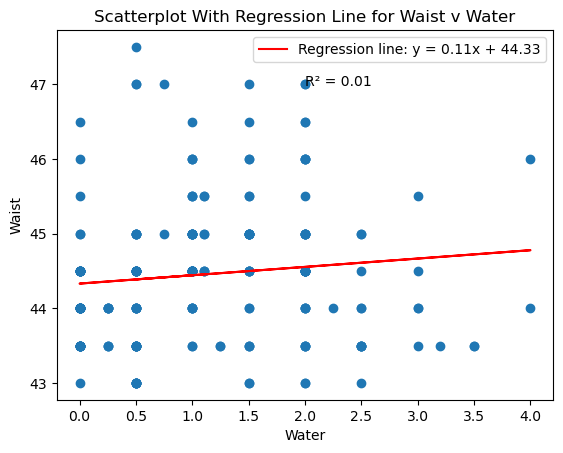

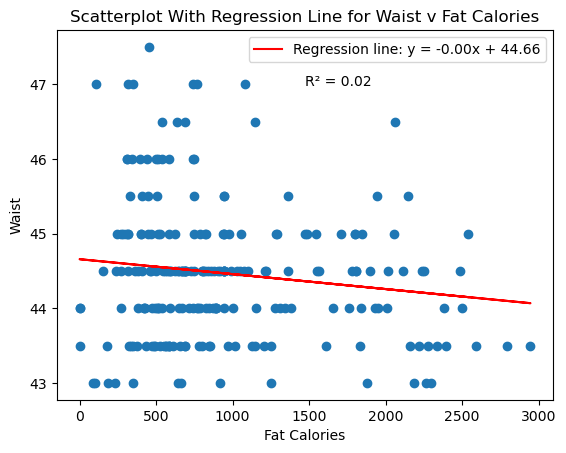

In [7]:
## Scatterplots With Regression Lines and R^2 For All Variables Against Waist
for i in subset:
    x = subset[[i]]
    y = subset['Waist']
    model = ols("y ~ x", subset).fit()
    df = pd.read_html(StringIO(model.summary().tables[1].as_html()),header=0,index_col=0)[0]
    slope = df['coef'].values[1]
    intercept = df['coef'].values[0]
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    plt.plot(x, intercept + slope*x, 'r', label=f'Regression line: {equation}')
    plt.text(0.5, 0.85, f'R² = {model.rsquared:.2f}', transform=plt.gca().transAxes)
    plt.xlabel(i)
    plt.ylabel('Waist')
    plt.title(f"Scatterplot With Regression Line for Waist v {i}")
    plt.legend()
    plt.show()

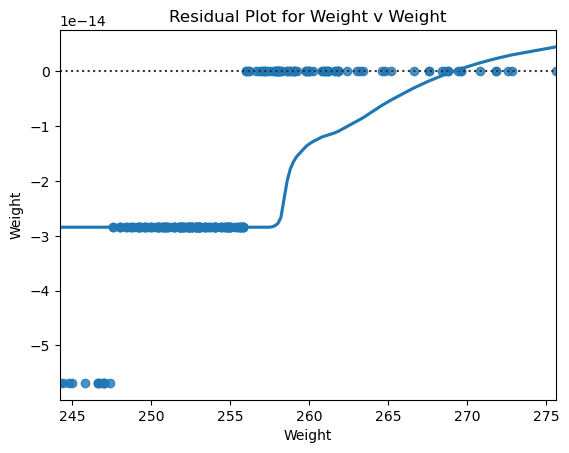

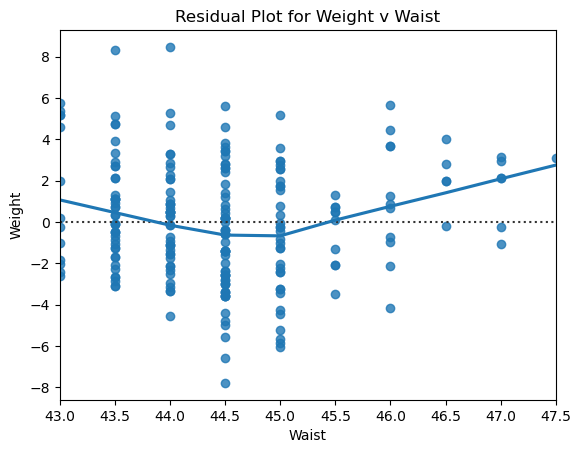

C:\Users\willc\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


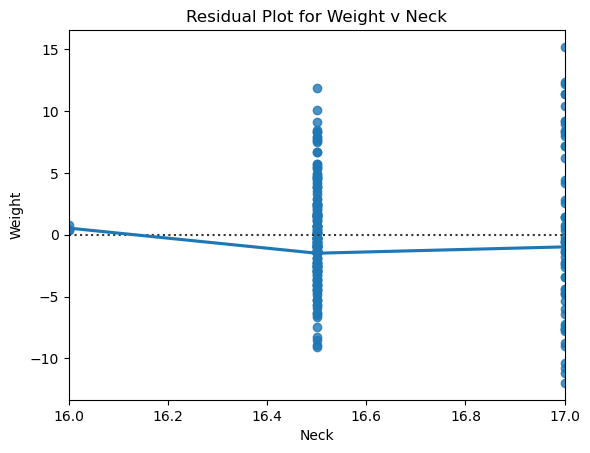

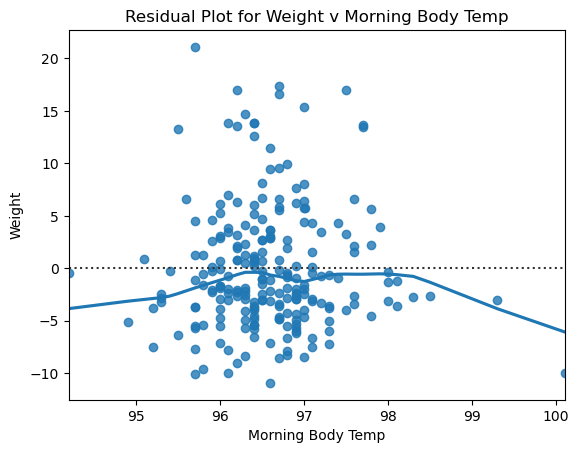

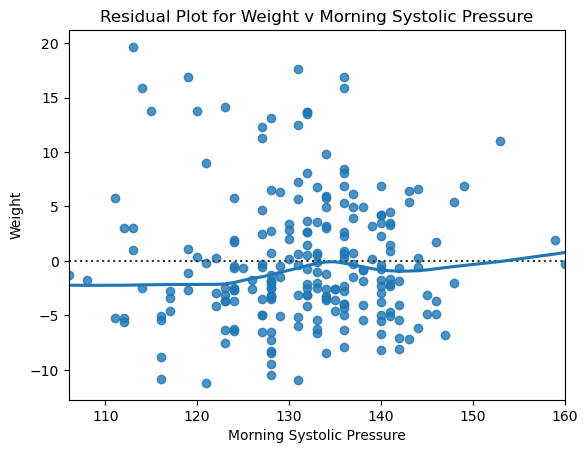

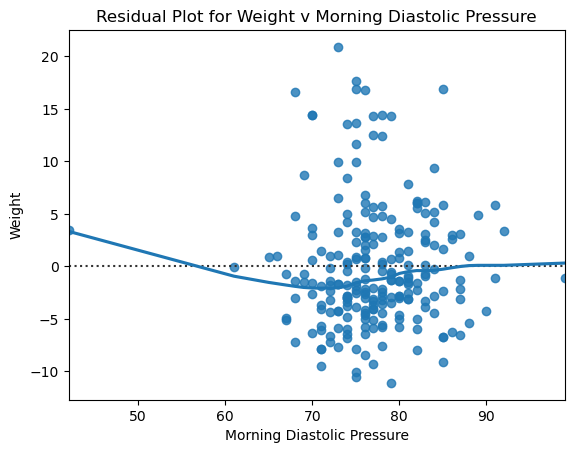

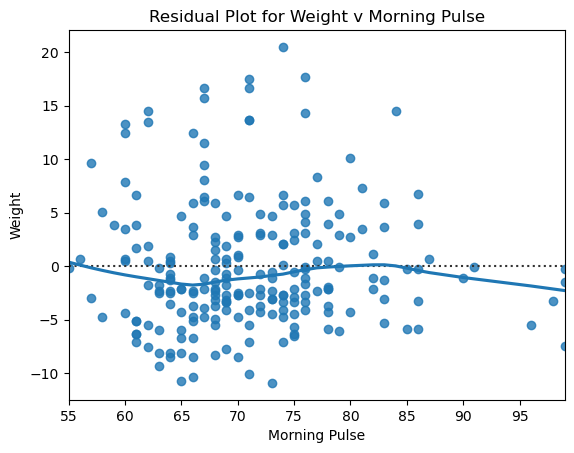

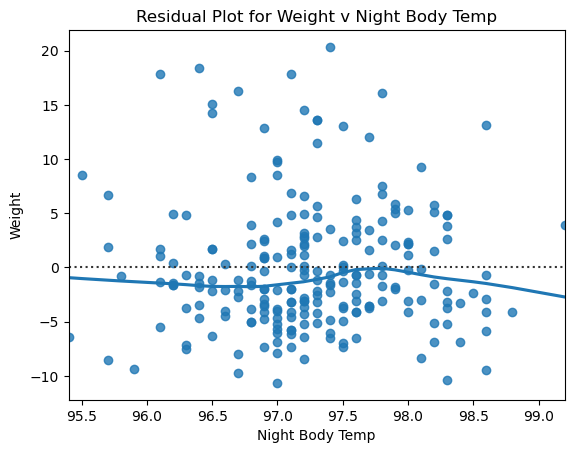

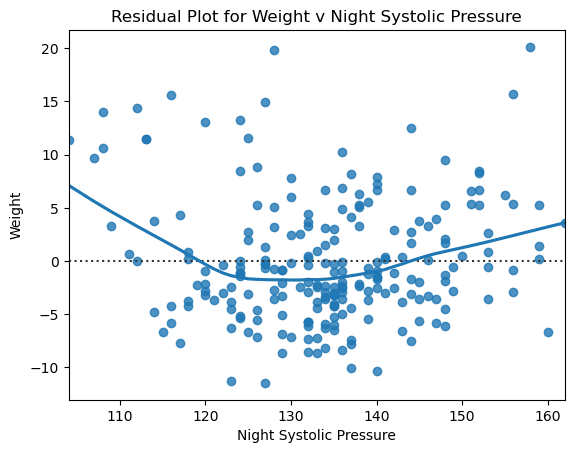

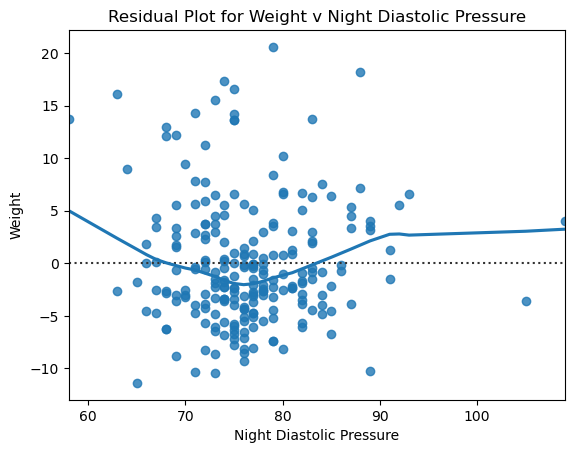

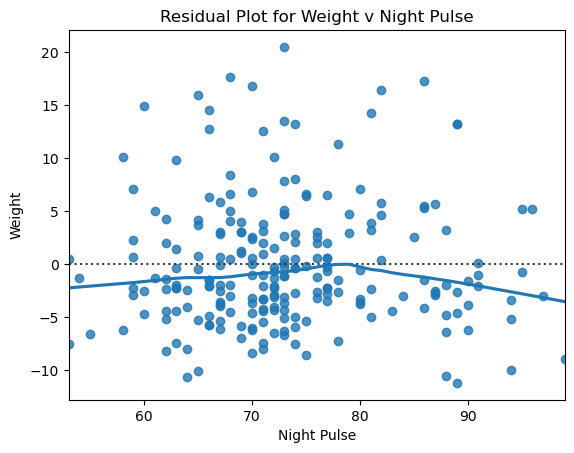

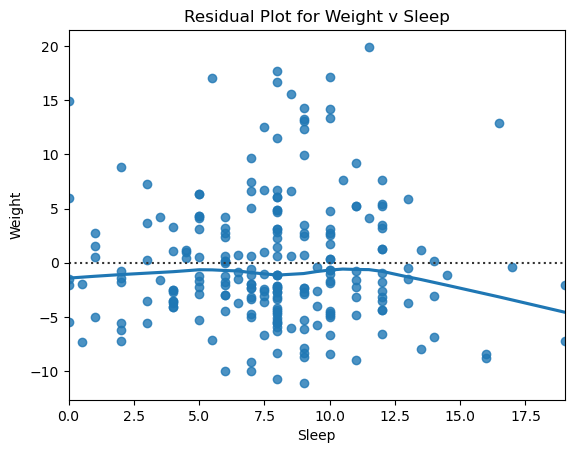

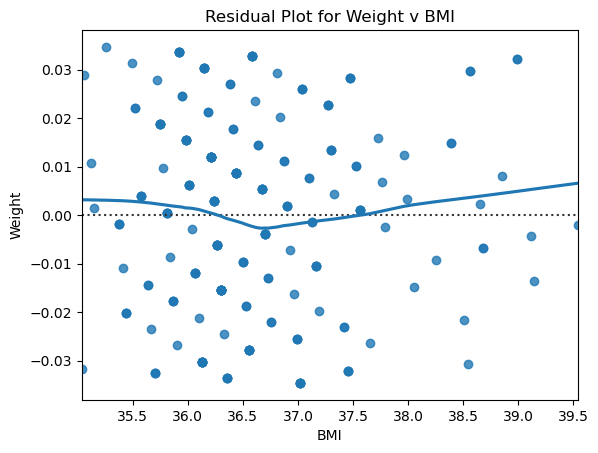

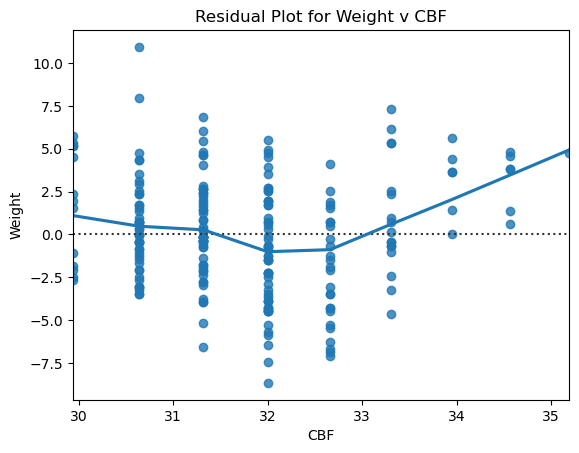

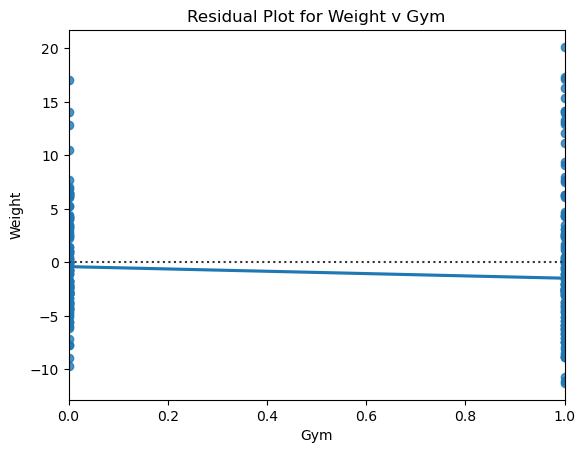

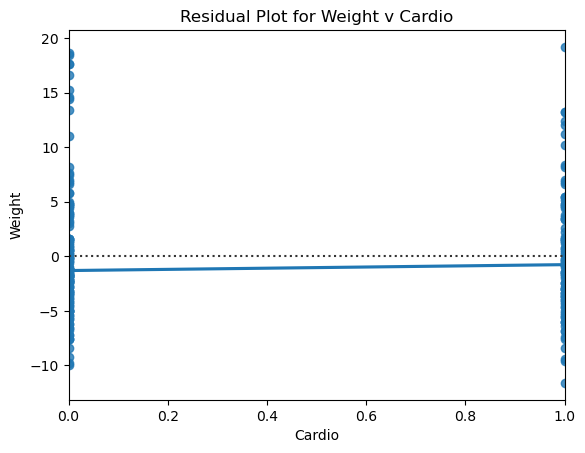

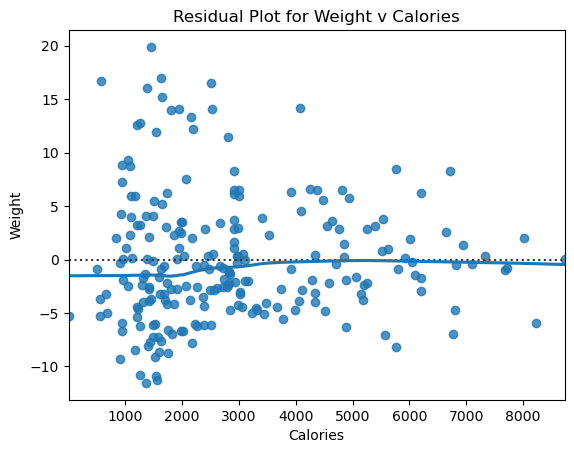

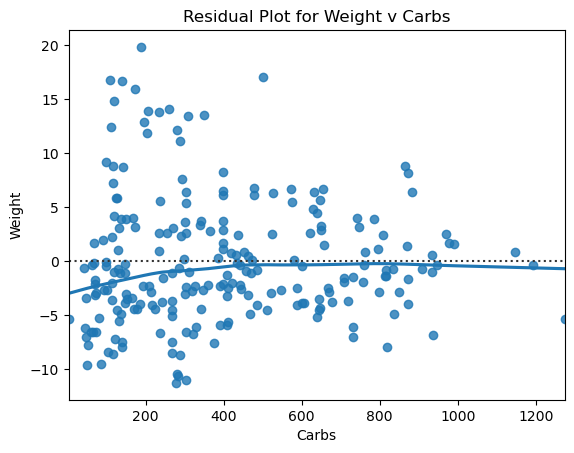

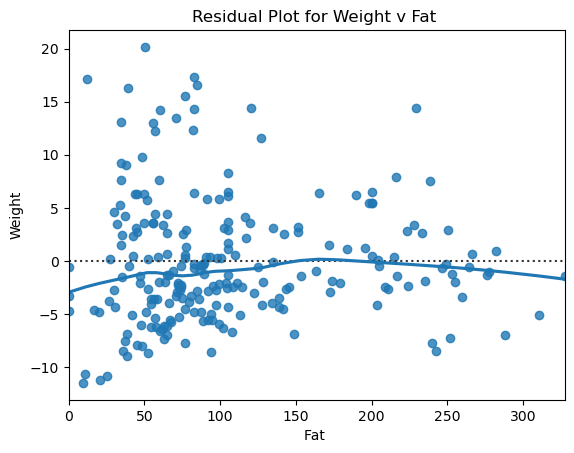

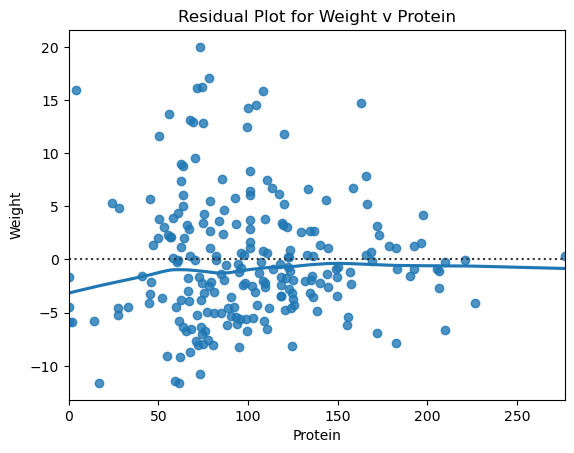

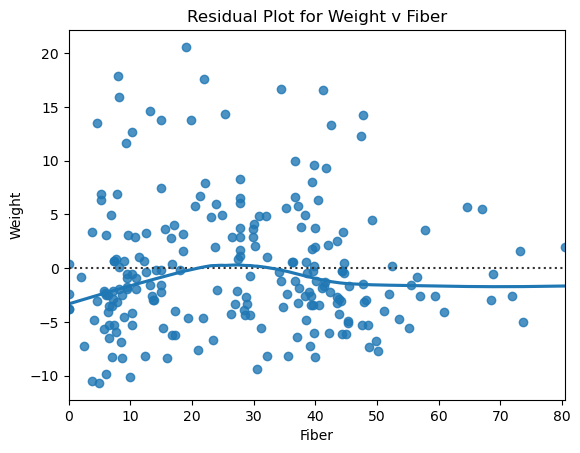

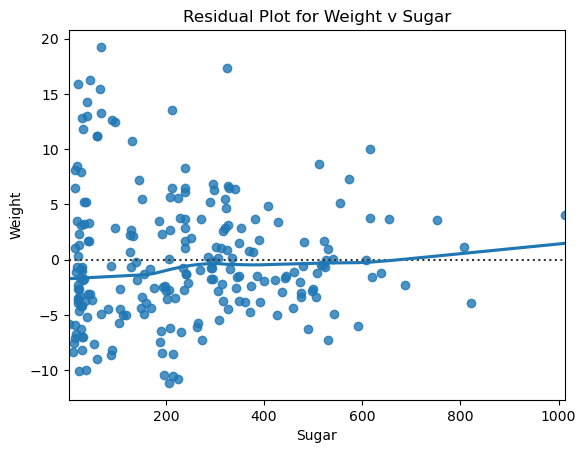

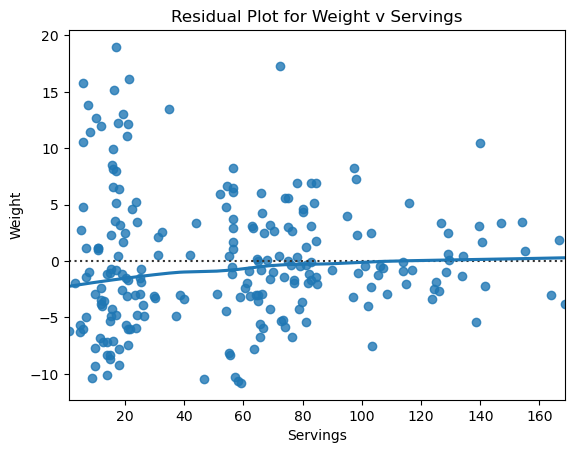

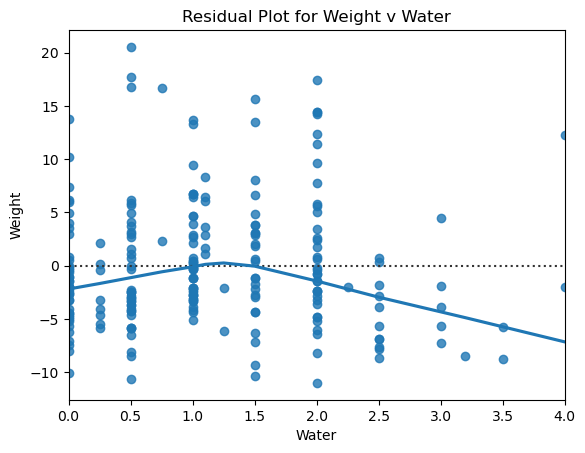

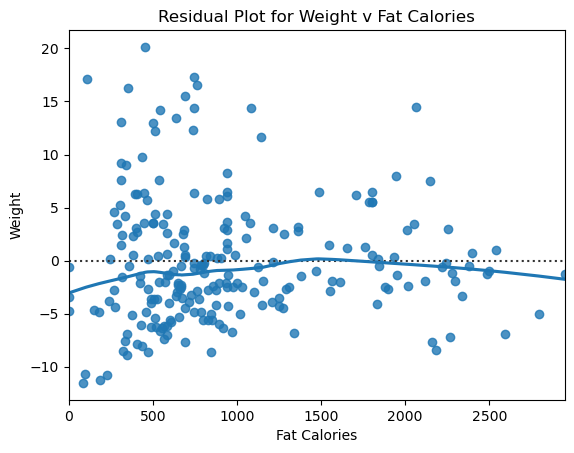

In [8]:
##Residual Plots for All Variables Against Weight
for i in subset:
    x = subset[[i]]
    y = subset['Weight']
    sns.residplot(x = x, 
              y = y, 
              data = subset, 
              lowess = True)
    plt.xlabel(i)
    plt.ylabel('Weight')
    plt.title(f"Residual Plot for Weight v {i}")
    plt.show()

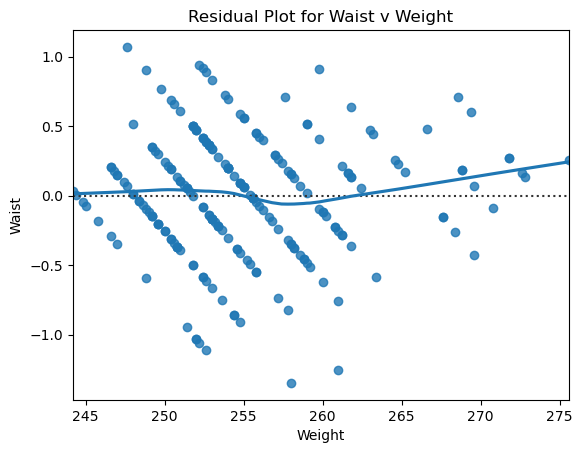

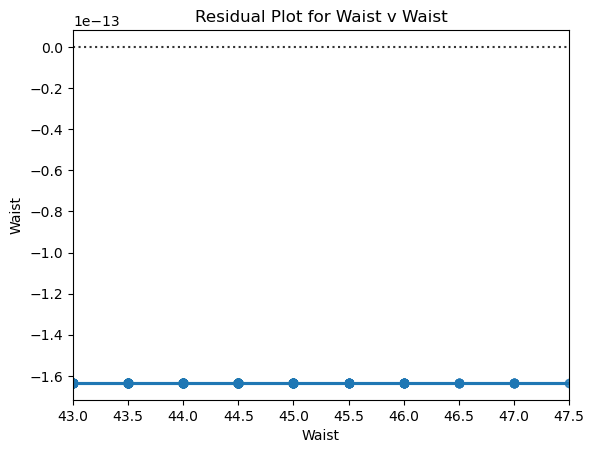

C:\Users\willc\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


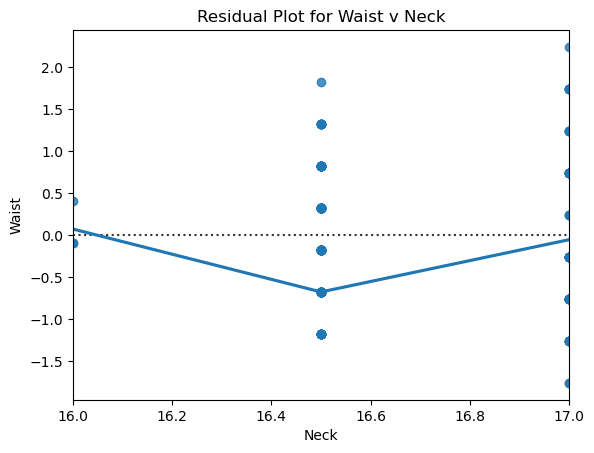

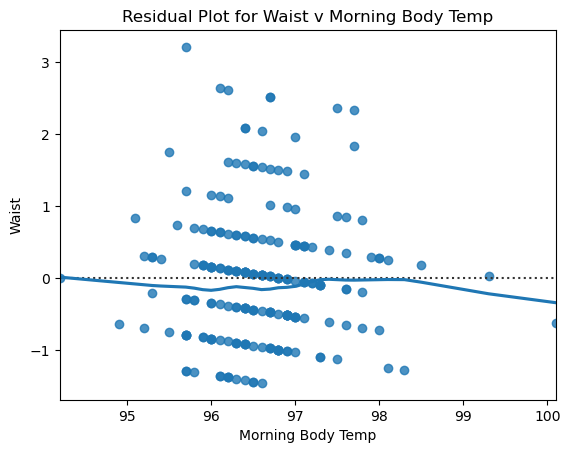

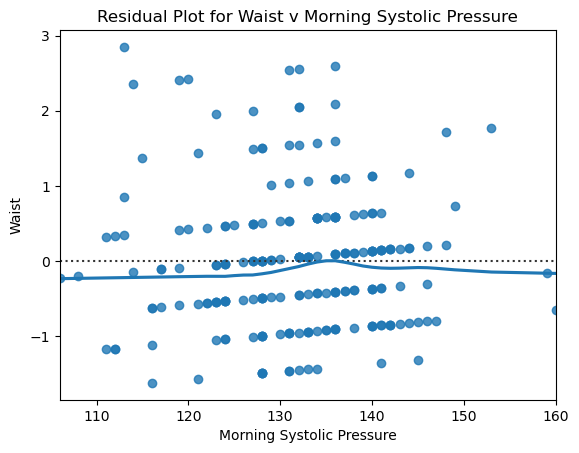

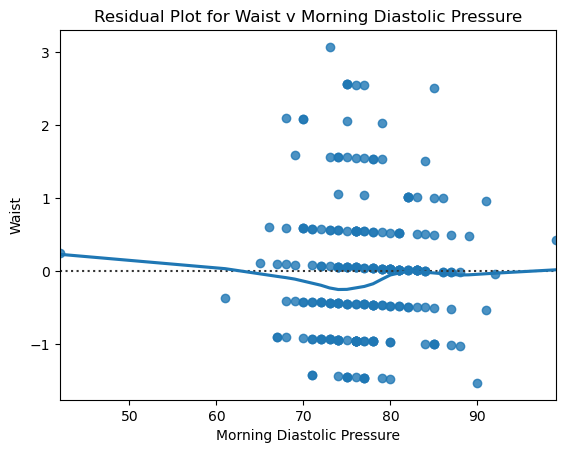

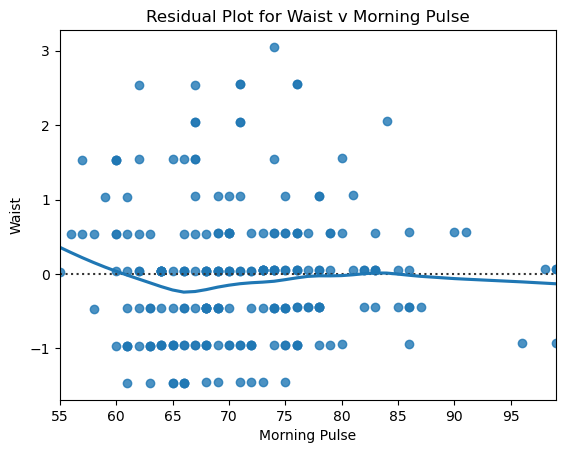

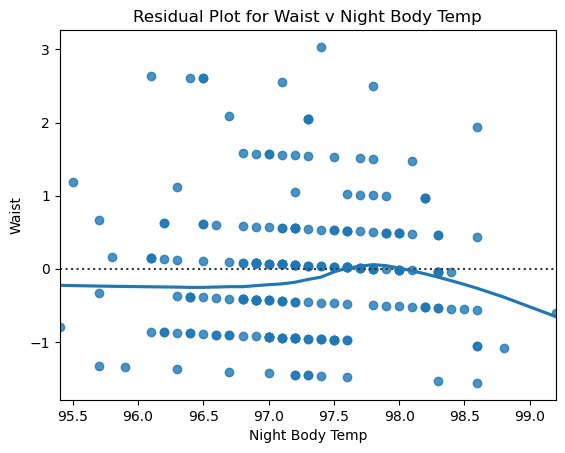

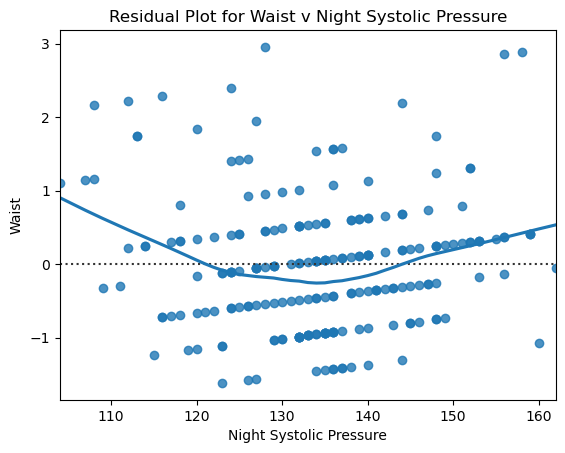

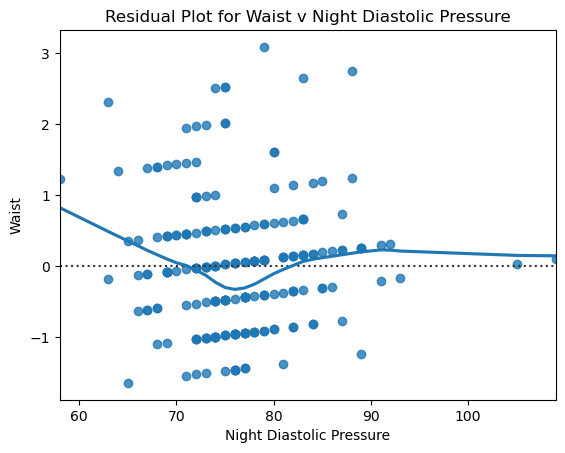

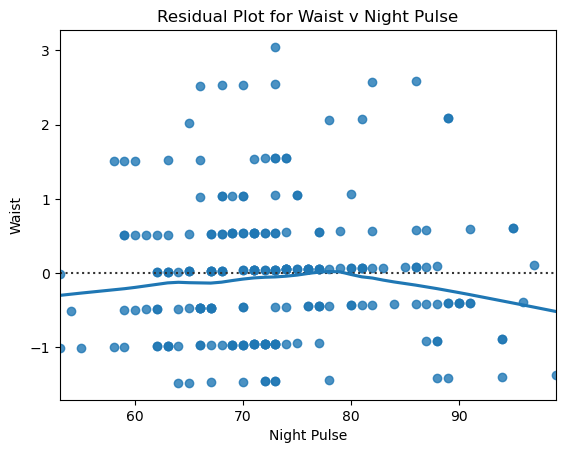

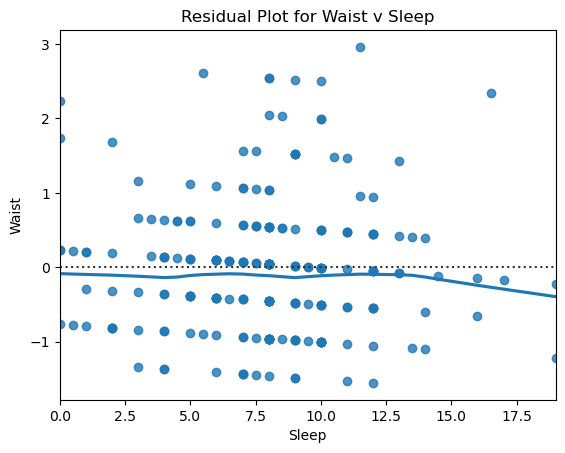

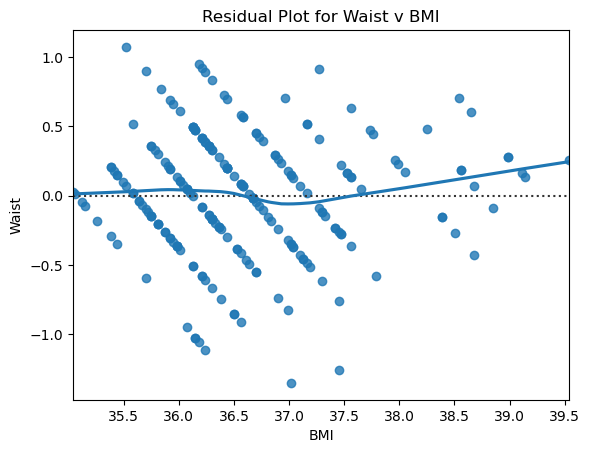

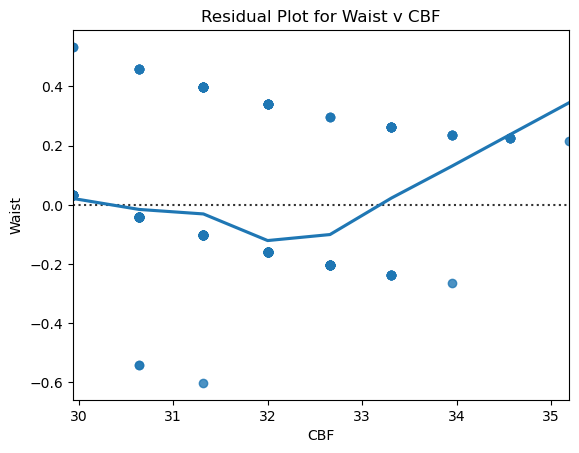

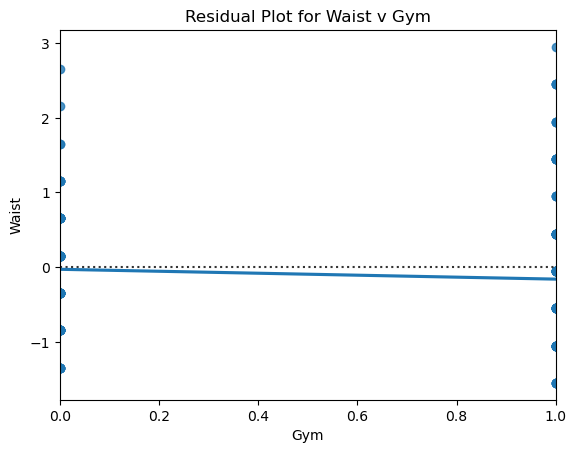

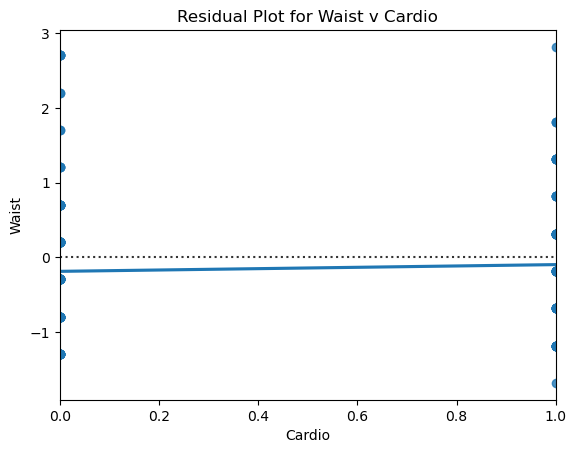

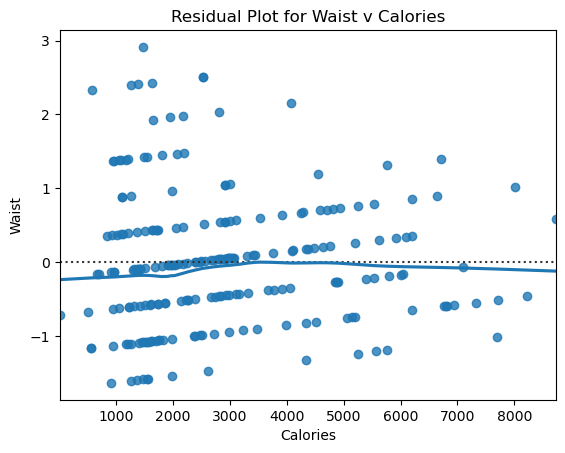

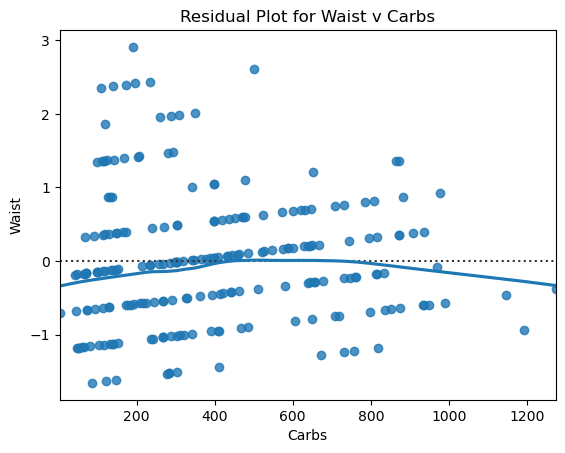

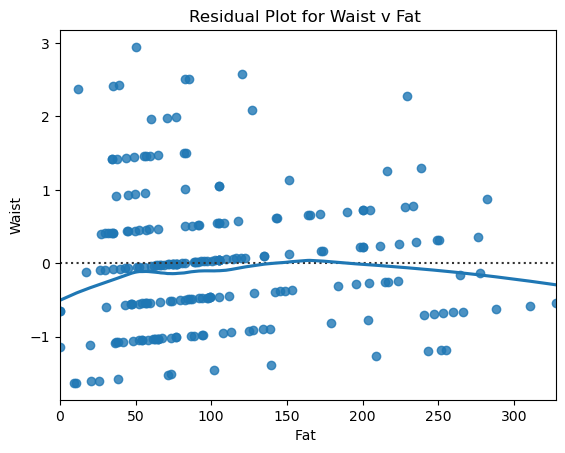

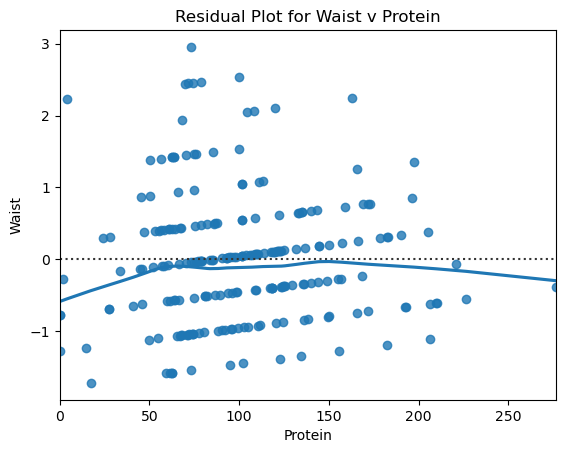

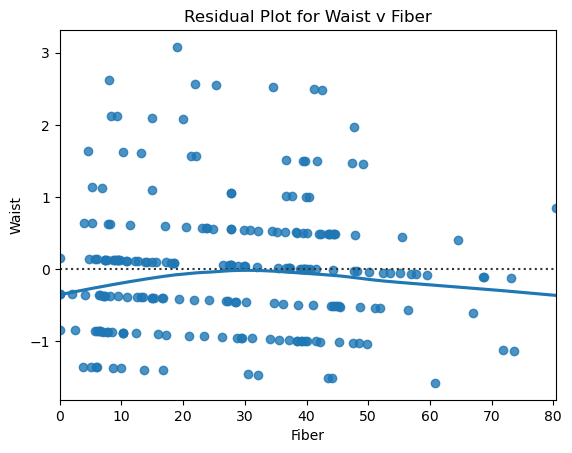

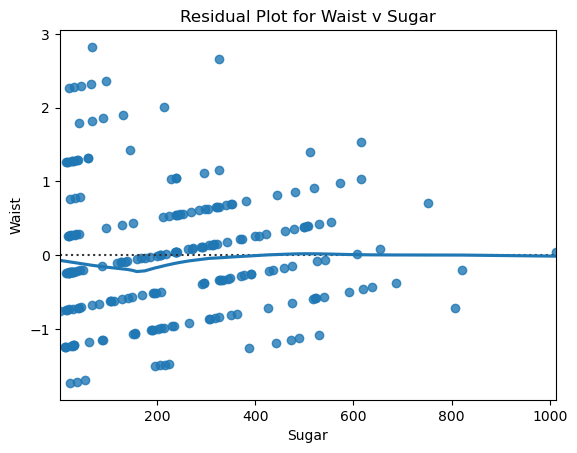

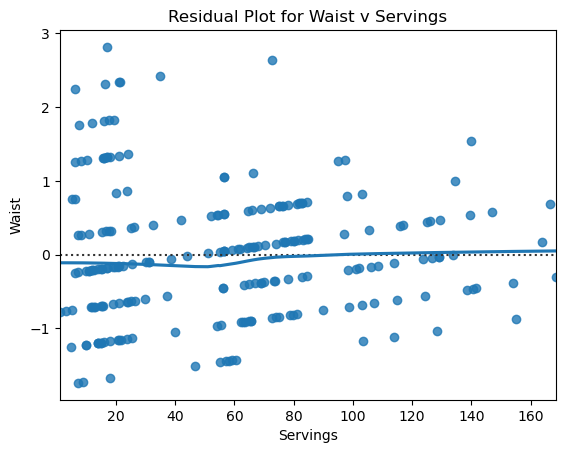

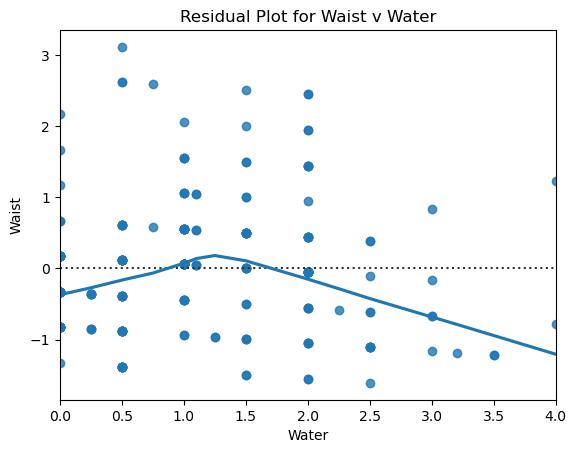

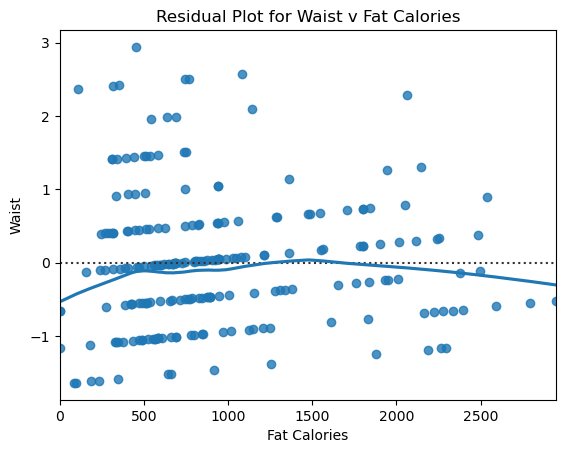

In [9]:
##Residual Plots for All Variables Against Waist
for i in subset:
    x = subset[[i]]
    y = subset['Waist']
    sns.residplot(x = x, 
              y = y, 
              data = subset, 
              lowess = True)
    plt.xlabel(i)
    plt.ylabel('Waist')
    plt.title(f"Residual Plot for Waist v {i}")
    plt.show()